# Part 2 Machine learning methods.

## Here, we are going to use the features we generated in Part 1 to predict the clients response to a promotion campaign. The clients responses are stored in the Retail Data Response.csv file from Kaggle. The responses are binary: 0 for clients who responded negatively to the promotional campaign and 1 for clients who responded positively to the campaign.

## 1.1 Import the monthly and annual data and join.

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams.update({'font.size': 16})
import seaborn as sns

In [3]:
annual_features = pd.read_excel('annual_features.xlsx')

In [4]:
annual_features

,customer_id,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,ann_txn_amt_max_2014,...,ann_txn_amt_var_2011,ann_txn_amt_var_2012,ann_txn_amt_var_2013,ann_txn_amt_var_2014,ann_txn_amt_var_2015,ann_txn_cnt_2011,ann_txn_cnt_2012,ann_txn_cnt_2013,ann_txn_cnt_2014,ann_txn_cnt_2015
0,CS1112,70.666667,67.400000,70.666667,70.666667,39.000000,96,81,105,90,...,485.333333,161.800000,1190.333333,284.333333,0.000000,3,5,3,3,1
1,CS1113,81.333333,74.800000,85.200000,56.500000,73.333333,94,95,97,97,...,444.333333,290.200000,171.200000,781.666667,745.333333,3,5,5,4,3
2,CS1114,85.200000,75.000000,70.400000,70.833333,79.000000,97,97,105,95,...,94.700000,968.000000,619.300000,726.166667,0.000000,5,2,5,6,1
3,CS1115,87.000000,67.571429,79.571429,78.250000,55.000000,102,104,94,98,...,225.000000,477.285714,110.952381,512.250000,0.000000,3,7,7,4,1
4,CS1116,58.750000,76.666667,59.000000,66.600000,0.000000,87,105,59,96,...,449.583333,908.333333,0.000000,636.800000,0.000000,4,3,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS8996,31.000000,33.666667,41.500000,56.000000,0.000000,38,38,50,79,...,98.000000,20.333333,144.500000,481.600000,0.000000,2,3,2,6,0
6885,CS8997,45.000000,39.500000,35.166667,42.000000,0.000000,47,49,75,45,...,8.000000,45.666667,441.366667,18.000000,0.000000,2,4,6,2,0
6886,CS8998,64.000000,54.400000,47.000000,32.500000,0.000000,69,79,75,49,...,50.000000,505.300000,1568.000000,219.666667,0.000000,2,5,2,4,0
6887,CS8999,52.000000,25.250000,28.000000,21.000000,0.000000,64,30,39,24,...,333.000000,21.583333,103.000000,18.000000,0.000000,3,4,3,2,0


In [5]:
annual_day_of_week_counts_pivot = pd.read_excel('annual_day_of_week_counts_pivot.xlsx')
annual_day_of_week_counts_pivot

,customer_id,cnt_2011_Friday,cnt_2011_Monday,cnt_2011_Saturday,cnt_2011_Sunday,cnt_2011_Thursday,cnt_2011_Tuesday,cnt_2011_Wednesday,cnt_2012_Friday,cnt_2012_Monday,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,CS1112,1,0,0,1,0,0,1,0,0,...,1,1,1,0,0,0,0,0,0,1
1,CS1113,1,1,0,1,0,0,0,2,1,...,0,3,0,0,2,0,0,0,0,1
2,CS1114,0,1,0,1,1,0,2,0,0,...,0,1,1,0,0,0,0,1,0,0
3,CS1115,0,0,1,1,0,0,1,1,1,...,2,0,2,0,0,0,0,1,0,0
4,CS1116,1,1,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6884,CS8996,0,1,0,0,0,1,0,0,0,...,1,1,2,0,0,0,0,0,0,0
6885,CS8997,0,0,0,0,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0
6886,CS8998,0,0,0,0,0,1,1,2,0,...,0,1,1,0,0,0,0,0,0,0
6887,CS8999,0,1,1,0,0,1,0,1,0,...,0,0,2,0,0,0,0,0,0,0


In [6]:
mth_rolling_features = pd.read_excel('mth_rolling_features.xlsx')

In [7]:
mth_day_counts = pd.read_excel('mth_day_counts.xlsx')

In [8]:
days_since_last_txn = pd.read_excel('days_since_last_txn.xlsx')

In [9]:
Retail_Data_Response = pd.read_csv('Retail_Data_Response.csv')

In [10]:
Retail_Data_Response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [11]:
annual_features_outputs = annual_features.merge(annual_day_of_week_counts_pivot, how = 'left', on = ['customer_id'])
annual_features_outputs = Retail_Data_Response.merge(annual_features_outputs, how = 'left', on = ['customer_id'])
annual_features_outputs

,customer_id,response,ann_txn_amt_ave_2011,ann_txn_amt_ave_2012,ann_txn_amt_ave_2013,ann_txn_amt_ave_2014,ann_txn_amt_ave_2015,ann_txn_amt_max_2011,ann_txn_amt_max_2012,ann_txn_amt_max_2013,...,cnt_2014_Thursday,cnt_2014_Tuesday,cnt_2014_Wednesday,cnt_2015_Friday,cnt_2015_Monday,cnt_2015_Saturday,cnt_2015_Sunday,cnt_2015_Thursday,cnt_2015_Tuesday,cnt_2015_Wednesday
0,CS1112,0,70.666667,67.400000,70.666667,70.666667,39.000000,96,81,105,...,1,1,1,0,0,0,0,0,0,1
1,CS1113,0,81.333333,74.800000,85.200000,56.500000,73.333333,94,95,97,...,0,3,0,0,2,0,0,0,0,1
2,CS1114,1,85.200000,75.000000,70.400000,70.833333,79.000000,97,97,105,...,0,1,1,0,0,0,0,1,0,0
3,CS1115,1,87.000000,67.571429,79.571429,78.250000,55.000000,102,104,94,...,2,0,2,0,0,0,0,1,0,0
4,CS1116,1,58.750000,76.666667,59.000000,66.600000,0.000000,87,105,59,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,CS8996,0,31.000000,33.666667,41.500000,56.000000,0.000000,38,38,50,...,1,1,2,0,0,0,0,0,0,0
6880,CS8997,0,45.000000,39.500000,35.166667,42.000000,0.000000,47,49,75,...,0,0,0,0,0,0,0,0,0,0
6881,CS8998,0,64.000000,54.400000,47.000000,32.500000,0.000000,69,79,75,...,0,1,1,0,0,0,0,0,0,0
6882,CS8999,0,52.000000,25.250000,28.000000,21.000000,0.000000,64,30,39,...,0,0,2,0,0,0,0,0,0,0


In [12]:
Retail_Data_Response.columns = ['CLNT_NO', 'response']

In [13]:
monthly_features_outputs = mth_rolling_features.merge(mth_day_counts, how = 'left', on = ['CLNT_NO', 'ME_DT'])
monthly_features_outputs = monthly_features_outputs.merge(days_since_last_txn, how = 'left', on = ['CLNT_NO', 'ME_DT'])
monthly_features_outputs = Retail_Data_Response.merge(monthly_features_outputs, how = 'left', on = ['CLNT_NO'])
monthly_features_outputs.drop(['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], inplace = True, axis = 1)

In [15]:
annual_features_outputs.to_excel('annual_features_outputs.xlsx')

In [16]:
monthly_features_outputs

,CLNT_NO,response,ME_DT,mth_txn_amt_sum,mth_txn_cnt,amt_sum_3M,amt_mean_3M,amt_max_3M,txn_cnt_sum_3M,txn_cnt_mean_3M,...,txn_cnt_mean_12M,txn_cnt_max_12M,cnt_Friday,cnt_Monday,cnt_Saturday,cnt_Sunday,cnt_Thursday,cnt_Tuesday,cnt_Wednesday,days_since_last_txn
0,CS1112,0,2011-05-31,0,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,0,NaN
1,CS1112,0,2011-06-30,56,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,0,0,0,0,1,15.0
2,CS1112,0,2011-07-31,0,0,56.0,18.666667,56.0,1.0,0.333333,...,NaN,NaN,0,0,0,0,0,0,0,46.0
3,CS1112,0,2011-08-31,96,1,152.0,50.666667,96.0,2.0,0.666667,...,NaN,NaN,1,0,0,0,0,0,0,12.0
4,CS1112,0,2011-09-30,0,0,96.0,32.000000,96.0,1.0,0.333333,...,NaN,NaN,0,0,0,0,0,0,0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323543,CS9000,0,2014-11-30,0,0,0.0,0.000000,0.0,0.0,0.000000,...,0.333333,1.0,0,0,0,0,0,0,0,98.0
323544,CS9000,0,2014-12-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,0.333333,1.0,0,0,0,0,0,0,0,129.0
323545,CS9000,0,2015-01-31,0,0,0.0,0.000000,0.0,0.0,0.000000,...,0.250000,1.0,0,0,0,0,0,0,0,160.0
323546,CS9000,0,2015-02-28,34,1,34.0,11.333333,34.0,1.0,0.333333,...,0.333333,1.0,0,0,1,0,0,0,0,0.0


In [17]:
monthly_features_outputs.to_excel("monthly_features_outputs.xlsx")

## 1.2 Steps for each method

### Annual Features - Logistic Regression

#### 1. Separate the inputs X and the output y in two data frames.

In [18]:
X_ann = annual_features_outputs.drop(['response'], axis = 1)
y_ann = annual_features_outputs['response']

#### 2. Split the data in train and test set.

In [19]:
X_train_annual, X_test_annual, y_train_annual, y_test_annual = train_test_split(X_ann, y_ann, test_size=2/3, random_state=1147)

#### 3. Pre-process.

In [20]:
scaler = StandardScaler()

In [21]:
X_train_annual_scaled = scaler.fit_transform(X_train_annual.iloc[:, 1:])

In [22]:
X_test_annual_scaled = scaler.transform(X_test_annual.iloc[:, 1:])

In [206]:
X_train_annual_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

#### 4. Fit the training dataset and optimize the hyperparameters of the method.

##### We first fit the model using different C values to find the optimal model.

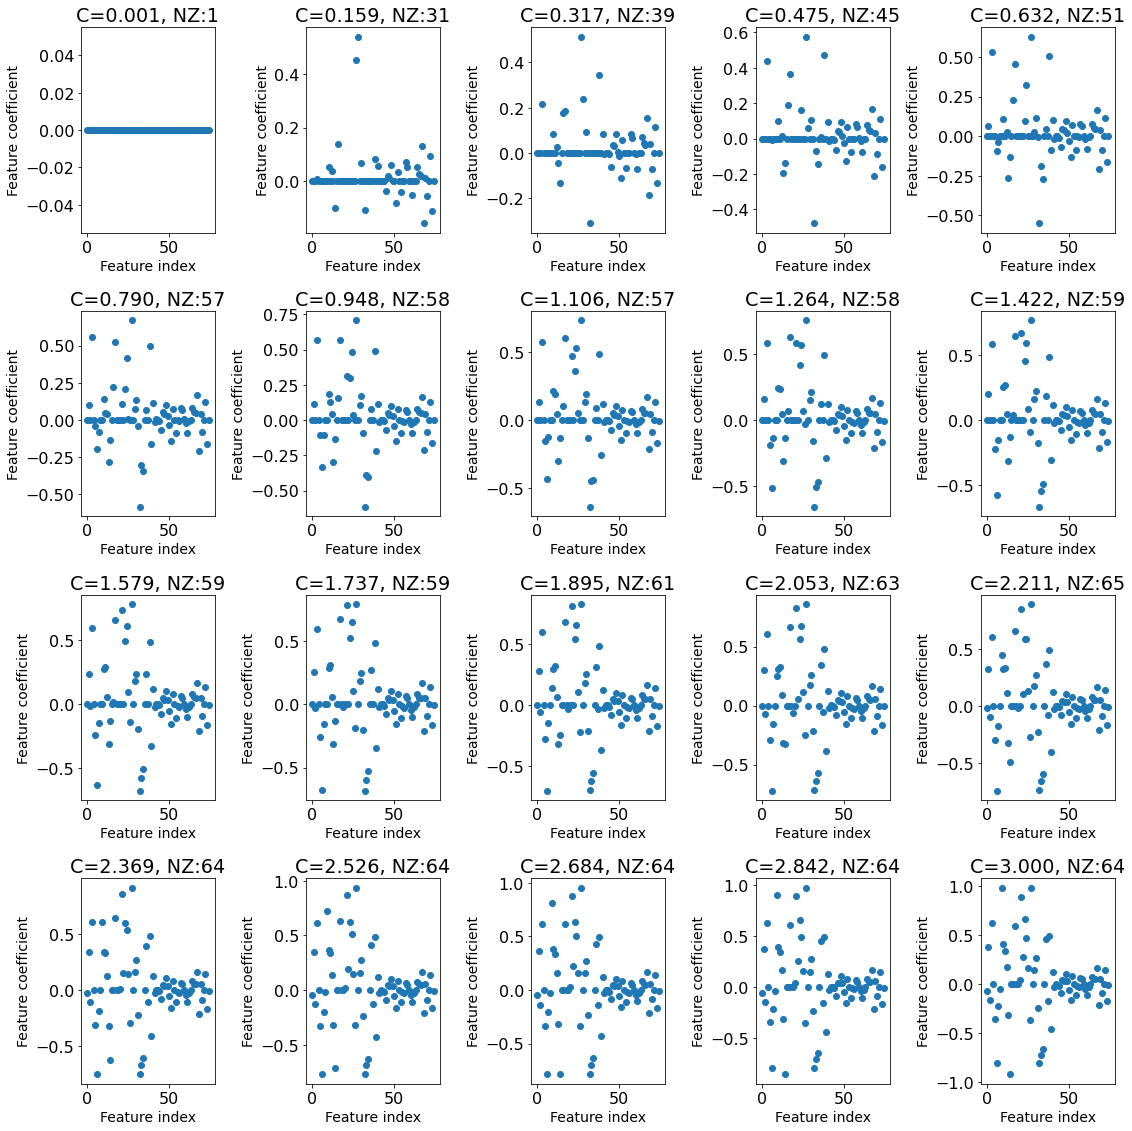

In [25]:
C = np.linspace(0.001, 3, 20)
# Smaller values, stronger regularization, more coefficients will go to zero

# Initialize the variables you want to save in an iterative manner
count                     = -1
Train_AUC_iter_LR         = np.zeros(shape=(len(C),1))
Test_AUC_iter_LR          = np.zeros(shape=(len(C),1))
NonZeroCoeff_LR           = np.zeros(shape=(len(C),1))
Model_Coeff_LR            = np.zeros(shape=(X_ann.shape[1] - 1, len(C)))

fig = plt.figure(figsize=(16, 16))

for c in C:
    count += 1
    # instantiate a logistic regression model, and fit with X and y
    model_LR = LogisticRegression(C=c, penalty='l1', solver="liblinear")
    # Fit the model
    model_LR.fit(X_train_annual_scaled, y_train_annual)
    Model_Coeff_LR[:,count] = model_LR.coef_[0,:]
    # Scores for train set
    scores_train_LR = model_LR.predict_proba(X_train_annual_scaled)[:, 1]
    # Scores for test set
    scores_test_LR = model_LR.predict_proba(X_test_annual_scaled)[:, 1]
    
    # ============================ #
    # === [Train: ROC and AUC] === #
    # ============================ #
    # ROC Calc
    fpr_train_LR, tpr_train_LR, _ = roc_curve(y_train_annual, scores_train_LR)
    # AUC Calc
    auc_train_LR = auc(fpr_train_LR, tpr_train_LR)
    Train_AUC_iter_LR[count,0] = auc_train_LR
    # ============================ #
    # === [Test: ROC and AUC] === #
    # ============================ #
    # ROC Calc
    fpr_test_LR, tpr_test_LR, _ = roc_curve(y_test_annual, scores_test_LR)
    # AUC Calc
    auc_test_LR = auc(fpr_test_LR, tpr_test_LR)
    Test_AUC_iter_LR[count,0] = auc_test_LR
    ### Extract the count of non-zero coefficients
    NonZeroCoeff_LR[count,0] = X_ann.shape[1] - (model_LR.coef_ == 0).sum()
    
    x = model_LR.coef_.transpose()   
    index = np.arange(len(x))  
    
    ax = fig.add_subplot(4,5,count+1)
    ax.scatter(index, x)
    ax.set_title('C=%.3f, NZ:%s' %(c,X_ann.shape[1]-(model_LR.coef_ == 0).sum()))
    ax.set_xlabel('Feature index', fontsize = 14)
    ax.set_ylabel('Feature coefficient', fontsize = 14)
plt.tight_layout()    
plt.show()

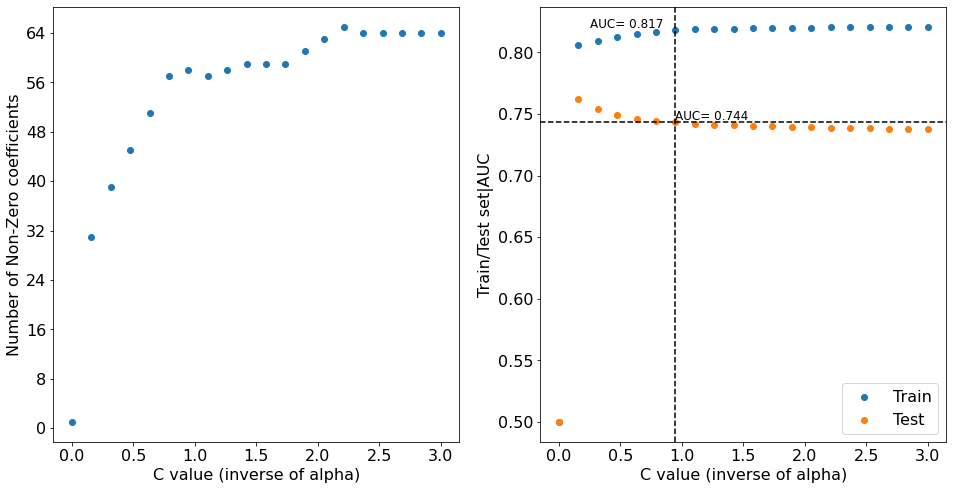

In [26]:
# Plot of the NonZero coefficients    
fig = plt.figure(figsize=(16, 8))
sub1 = fig.add_subplot(121)
plt.scatter(C, NonZeroCoeff_LR)
sub1.set_ylabel('Number of Non-Zero coefficients')
sub1.set_xlabel('C value (inverse of alpha)')
sub1.yaxis.set_major_locator(MaxNLocator(integer=True))
# sub1.set_xlim(0.01,1)
# plt.xscale('log')
# plt.show()

sub2 = fig.add_subplot(122)
plt.scatter(C, Train_AUC_iter_LR)
plt.scatter(C, Test_AUC_iter_LR)
sub2.set_xlabel('C value (inverse of alpha)')
sub2.set_ylabel('Train/Test set|AUC')
# sub1.set_xlim(0.02,0.06)
plt.annotate('AUC= %0.3f' %(Test_AUC_iter_LR[5]), xy=(C[6], 1.003*Test_AUC_iter_LR[6]), xycoords='data',horizontalalignment= 'left', fontsize = 12)
plt.annotate('AUC= %0.3f' %(Train_AUC_iter_LR[5]), xy=(0.9*C[6], 1.003*Train_AUC_iter_LR[6]), xycoords='data',horizontalalignment= 'right', fontsize = 12)
plt.legend(['Train','Test'], loc ='lower right')
plt.axhline(Test_AUC_iter_LR[6], color = 'k', linestyle = '--')
plt.axvline(C[6], color = 'k', linestyle = '--')
# plt.plot([C[8],C[8]],[plt.ylim()[0],Test_AUC_iter_LR[8]])
# plt.xscale('log')

plt.show()

##### I will use C = 0.790, because if continuing to increase C-value, the number of non-zero coefficients will not change much, but AUC for test set will decrease.

In [207]:
LogReg = LogisticRegression(penalty='l1', solver="liblinear", C=0.79)
LogReg.fit(X_train_annual_scaled, y_train_annual)

LogisticRegression(C=0.79, penalty='l1', solver='liblinear')

In [208]:
m = LogReg.coef_
b = LogReg.intercept_

In [219]:
m

array([[ 0.        ,  0.09804002,  0.        ,  0.55405865,  0.        ,
        -0.03801916, -0.19676538, -0.07893385,  0.        ,  0.        ,
         0.13807507,  0.04434995,  0.03849835, -0.28509375, -0.13258291,
         0.        ,  0.2211349 ,  0.52254804,  0.        ,  0.        ,
         0.        ,  0.10607183,  0.        ,  0.21055696,  0.41621986,
         0.00415288,  0.        ,  0.66905502,  0.        ,  0.0761873 ,
         0.13494833, -0.04422274, -0.58672749, -0.30346529, -0.34610678,
         0.        ,  0.06687409,  0.        ,  0.49862967, -0.16363946,
         0.11156172, -0.0144142 ,  0.00374075,  0.        , -0.00514897,
        -0.06844517,  0.05050154,  0.03708227,  0.09902971,  0.02354275,
        -0.03744922, -0.13994349,  0.07467309,  0.        , -0.08812851,
         0.        , -0.00758663,  0.0769948 ,  0.06453192,  0.00365671,
        -0.0204505 , -0.08701889, -0.00753923,  0.        ,  0.07924215,
         0.05370348,  0.04686004,  0.16658133, -0.2

#### 5. Plot coeffcient values or feature importance.

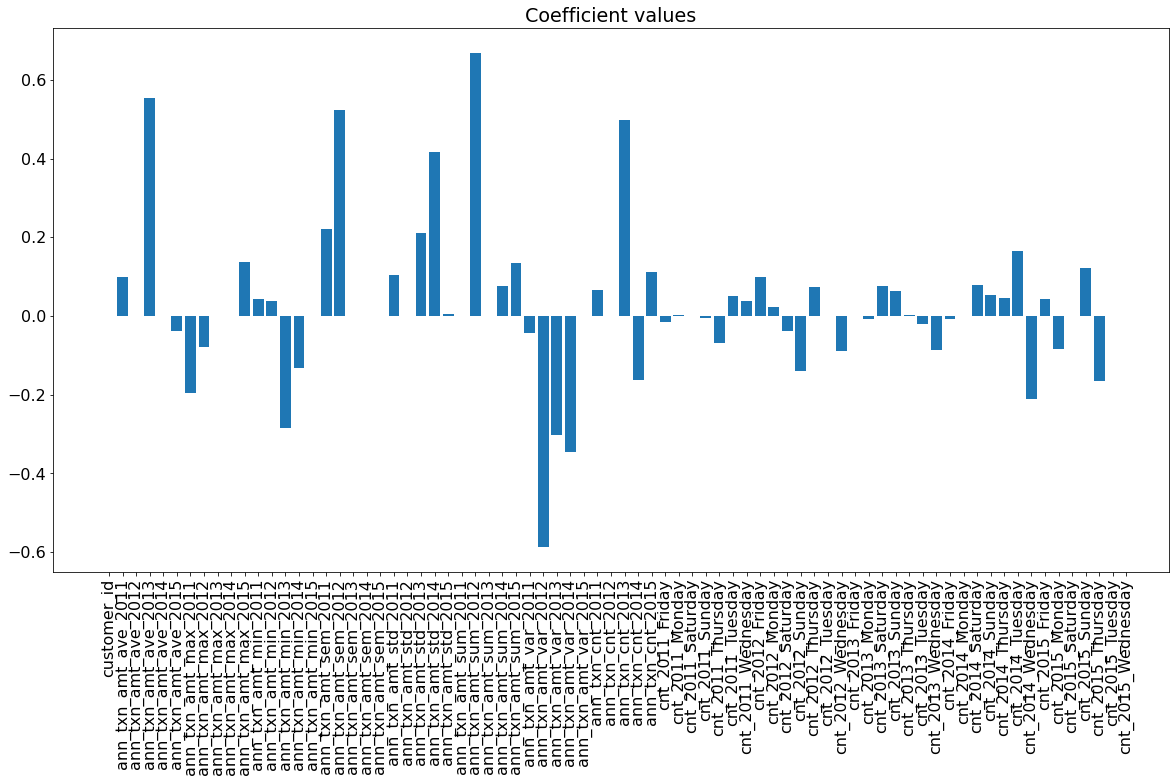

In [30]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.figure()
plt.title("Coefficient values")
plt.bar(range(X_ann.shape[1] - 1), m[0])
plt.xticks(range(X_ann.shape[1]), X_ann.columns, rotation=90)
plt.show()

#### 6. Plot probability distribution for test set.

In [31]:
y_test_proba = LogReg.predict_proba(X_test_annual_scaled)
y_test_proba

array([[0.98562714, 0.01437286],
       [0.92036192, 0.07963808],
       [0.93132439, 0.06867561],
       ...,
       [0.92920773, 0.07079227],
       [0.97734859, 0.02265141],
       [0.46689376, 0.53310624]])

In [32]:
np.mean(y_test_proba[:,1])

0.0836900533151672

Text(8.280000000000001, 0.5, 'Counts of clients')

<Figure size 1440x720 with 0 Axes>

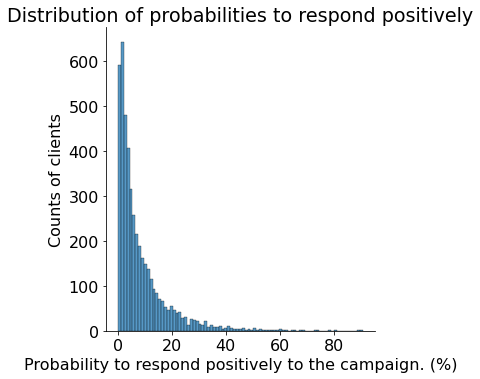

In [33]:
plt.figure(figsize=(20,10))
sns.displot(data = y_test_proba[:,1], x = 100*y_test_proba[:,1])
plt.title('Distribution of probabilities to respond positively')
plt.xlabel('Probability to respond positively to the campaign. (%)')
plt.ylabel('Counts of clients')

#### 7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

##### train data - confusion matrix

In [34]:
y_train_predicted = LogReg.predict(X_train_annual_scaled)
y_train_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
cm = confusion_matrix(y_train_annual, y_train_predicted)
print(cm)

[[2092    6]
 [ 181   15]]


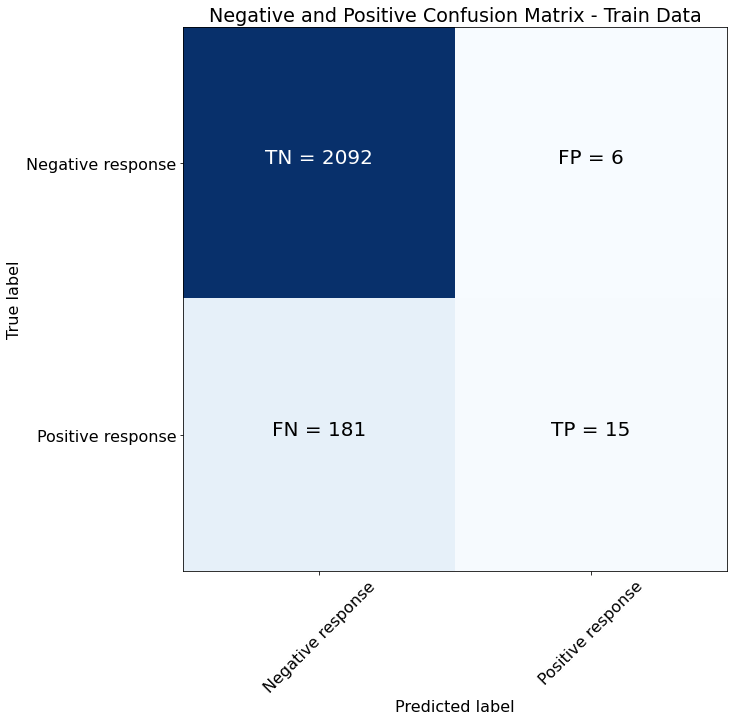

In [36]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative response','Positive response']
plt.title('Negative and Positive Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

##### train data - precision and recall

In [37]:
print(classification_report(y_train_annual, y_train_predicted, target_names = ['Negative response', 'Positive response']))

                   precision    recall  f1-score   support

Negative response       0.92      1.00      0.96      2098
Positive response       0.71      0.08      0.14       196

         accuracy                           0.92      2294
        macro avg       0.82      0.54      0.55      2294
     weighted avg       0.90      0.92      0.89      2294



In [38]:
accuracy_score(y_train_annual, y_train_predicted)

0.9184829991281604

##### test data - confusion matrix

In [39]:
y_test_predicted = LogReg.predict(X_test_annual_scaled)
y_test_predicted

array([0, 0, 0, ..., 0, 0, 1])

In [40]:
cm = confusion_matrix(y_test_annual, y_test_predicted)
print(cm)

[[4110   29]
 [ 443    8]]


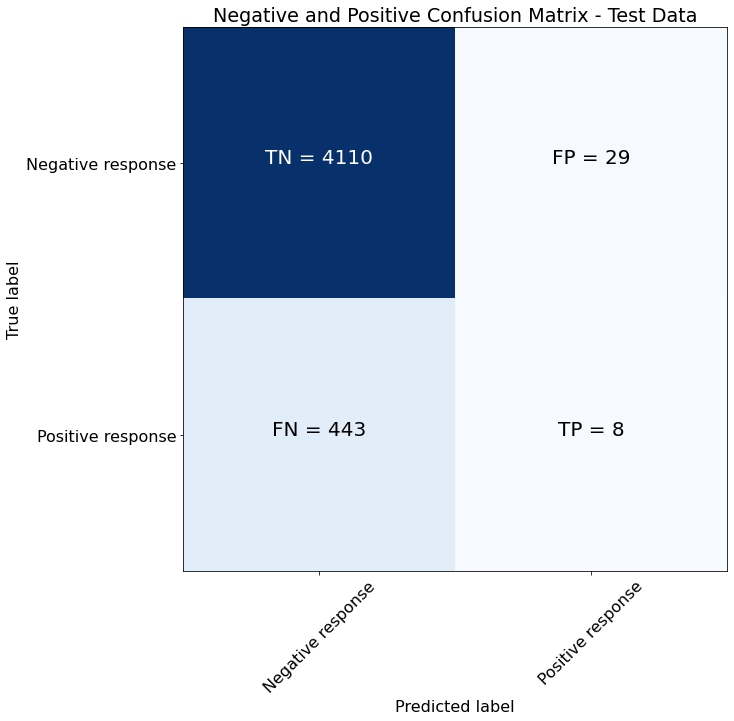

In [41]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative response','Positive response']
plt.title('Negative and Positive Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

##### test data - precision and recall

In [42]:
print(classification_report(y_test_annual, y_test_predicted, target_names = ['Negative response', 'Positive response']))

                   precision    recall  f1-score   support

Negative response       0.90      0.99      0.95      4139
Positive response       0.22      0.02      0.03       451

         accuracy                           0.90      4590
        macro avg       0.56      0.51      0.49      4590
     weighted avg       0.84      0.90      0.86      4590



##### ROC curve

In [224]:
# Scores for train set
scores_train = LogReg.predict_proba(X_train_annual_scaled)[:, 1]
# Scores for test set
scores_test = LogReg.predict_proba(X_test_annual_scaled)[:, 1]

In [231]:
LogReg.predict_proba(X_train_annual_scaled)

array([[0.85499252, 0.14500748],
       [0.93593789, 0.06406211],
       [0.97874028, 0.02125972],
       ...,
       [0.96755336, 0.03244664],
       [0.97492093, 0.02507907],
       [0.96849529, 0.03150471]])

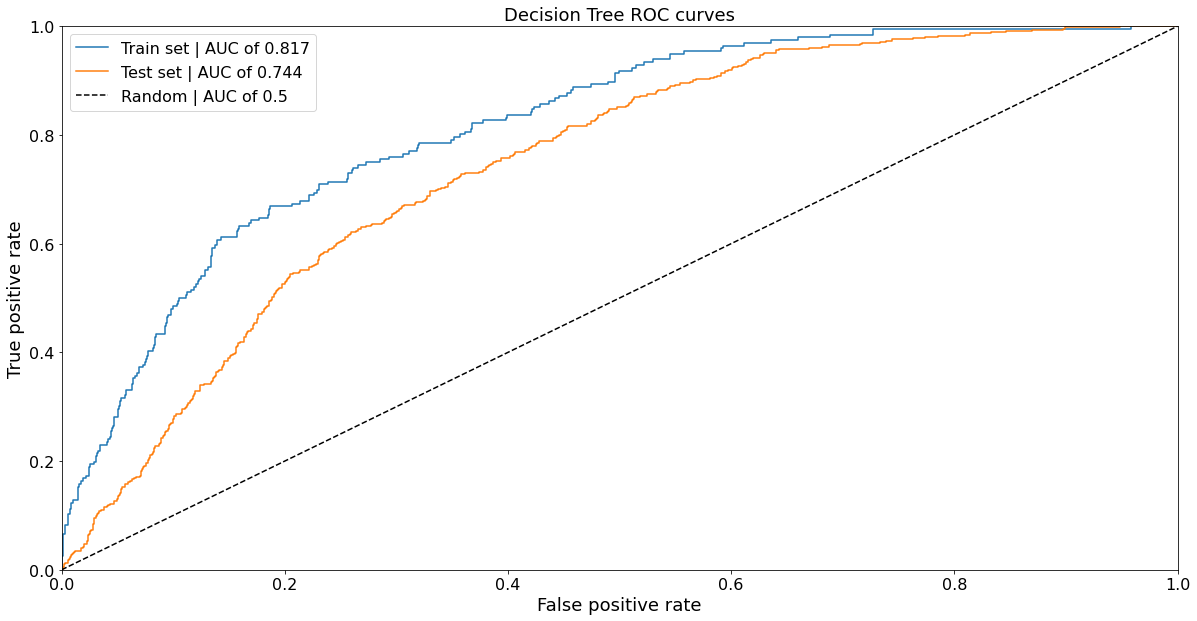

In [44]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

##### Plot decision boundary for top 2 features.

In [45]:
np.argsort(m)[0][-2:]

array([ 3, 27])

In [46]:
X_train_annual.iloc[:, 1:].columns[3]

'ann_txn_amt_ave_2014'

In [47]:
X_train_annual.iloc[:, 1:].columns[27]

'ann_txn_amt_sum_2013'

#### The coefficients with the highest values are *ann_txn_amt_ave_2014* (4th column) and *ann_txn_amt_sum_2013* (28th column).

In [48]:
X_train_annual_scaled.min(axis=0)[3]

-3.614453237444465

In [49]:
X_train_annual_scaled.max(axis=0)[3]

2.3736537250633813

In [50]:
X_train_annual_scaled.min(axis=0)[27]

-1.6977424959358869

In [51]:
X_train_annual_scaled.max(axis=0)[27]

5.53912436943854

In [52]:
xx, yy = np.mgrid[-4:4:1/3, -2:6:1/3] # The steps 0.5 and 0.5 were selected to create a 24x24 grid
grid = np.c_[xx.ravel(), yy.ravel()]
grid.shape#.shape # Confirm that grid shape is 24x24

(576, 2)

In [53]:
median_inputs = np.ones((576, 75)) * np.median(X_train_annual_scaled, axis=0)
pd.DataFrame(median_inputs).iloc[:10, 15:29]

,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534
1,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534
2,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534
3,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534
4,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534
5,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534
6,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534
7,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534
8,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534
9,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534


In [54]:
median_inputs[:,3] = grid[:,0]
median_inputs[:,27] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:10, :29]
df.style.apply(lambda x: ['background: grey' if (x.name == 3)|(x.name == 27)  else '' for i in x])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.207915,0.193815,0.200782,-4.000000,0.133991,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-2.000000,-0.122534
1,0.207915,0.193815,0.200782,-4.000000,0.133991,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-1.666667,-0.122534
2,0.207915,0.193815,0.200782,-4.000000,0.133991,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-1.333333,-0.122534
3,0.207915,0.193815,0.200782,-4.000000,0.133991,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-1.000000,-0.122534
4,0.207915,0.193815,0.200782,-4.000000,0.133991,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.666667,-0.122534
5,0.207915,0.193815,0.200782,-4.000000,0.133991,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.333333,-0.122534
6,0.207915,0.193815,0.200782,-4.000000,0.133991,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,0.000000,-0.122534
7,0.207915,0.193815,0.200782,-4.000000,0.133991,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,0.333333,-0.122534
8,0.207915,0.193815,0.200782,-4.000000,0.133991,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,0.666667,-0.122534
9,0.207915,0.193815,0.200782,-4.000000,0.133991,0.190266,0.294652,0.305206,0.284052,0.086339,-0.041356,-0.068578,-0.019906,-0.030642,0.062788,-0.004605,-0.100143,-0.103779,-0.103324,-0.460524,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,1.000000,-0.122534


In [55]:
# Score the artificial data on the grid
probs = LogReg.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[None,
 (-2.0, 4.0),
 (-2.0, 5.0),
 Text(0.5, 0, 'ann_txn_amt_ave_2014 scaled'),
 Text(0, 0.5, 'ann_txn_amt_sum_2013 scaled')]

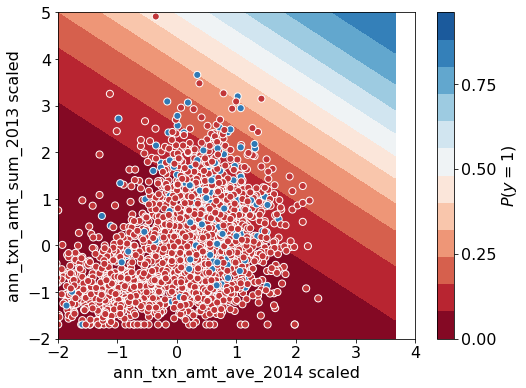

In [56]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 12, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual_scaled[:, 3], X_train_annual_scaled[:, 27], c=y_train_annual[:], s=50,
           cmap="RdBu", vmin=-0.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 4), ylim=(-2, 5),
       xlabel="ann_txn_amt_ave_2014 scaled", ylabel="ann_txn_amt_sum_2013 scaled")

### Annual Features - Decision Tree

#### 4. Fit the training dataset and optimize the hyperparameters of the method.

In [57]:
max_depth_range = range(1, 7)
estimator_max_depth = []
accuracy_normalized = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=1147, max_depth = i))
    estimator_max_depth[i-1].fit(X_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(X_train_annual_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(X_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(X_test_annual_scaled)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_annual, y_test_predicted, normalize = True))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [58]:
performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df

,ACCURACY,AUC_TRAIN,AUC_TEST,MAX_DEPTH
0,90.174292,0.700504,0.678205,1
1,90.174292,0.736396,0.697802,2
2,90.174292,0.762659,0.704718,3
3,89.389978,0.792137,0.721859,4
4,89.411765,0.835687,0.732598,5
5,89.172113,0.870947,0.686217,6


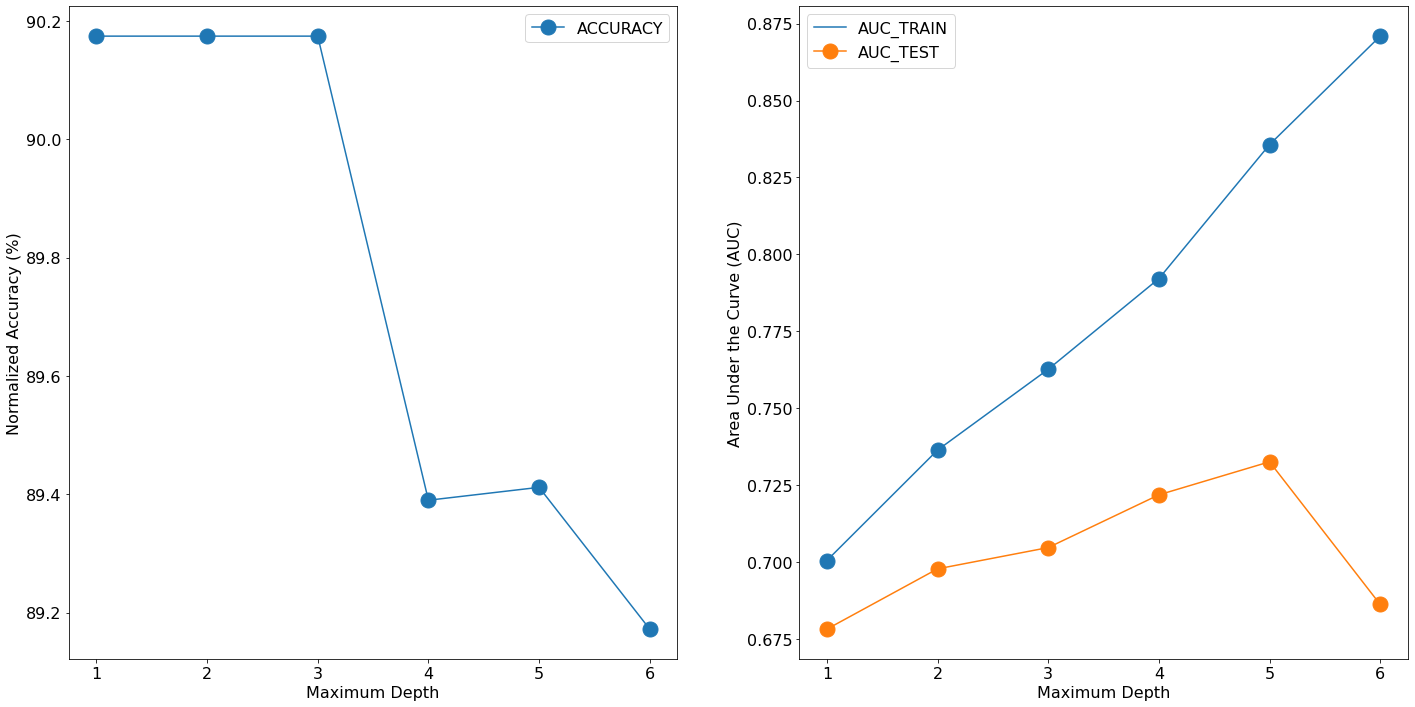

In [59]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'ACCURACY', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("Normalized Accuracy (%)")
ax1.set_xlabel("Maximum Depth")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

##### I will choose maximum depth to be 5, since AUCs for both train data and test data were increaseing before 5, and will decrease after 5.

In [60]:
estimator = DecisionTreeClassifier(criterion = 'entropy', random_state=1147, ccp_alpha = 0.004, max_depth = 5)
model_dt = estimator.fit(X_train_annual_scaled, y_train_annual)

#### 5. Plot coeffcient values or feature importance.

In [61]:
importances = model_dt.feature_importances_
importances

array([0.        , 0.05477276, 0.        , 0.05635803, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06409477, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.1899639 , 0.57573623, 0.05907431,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

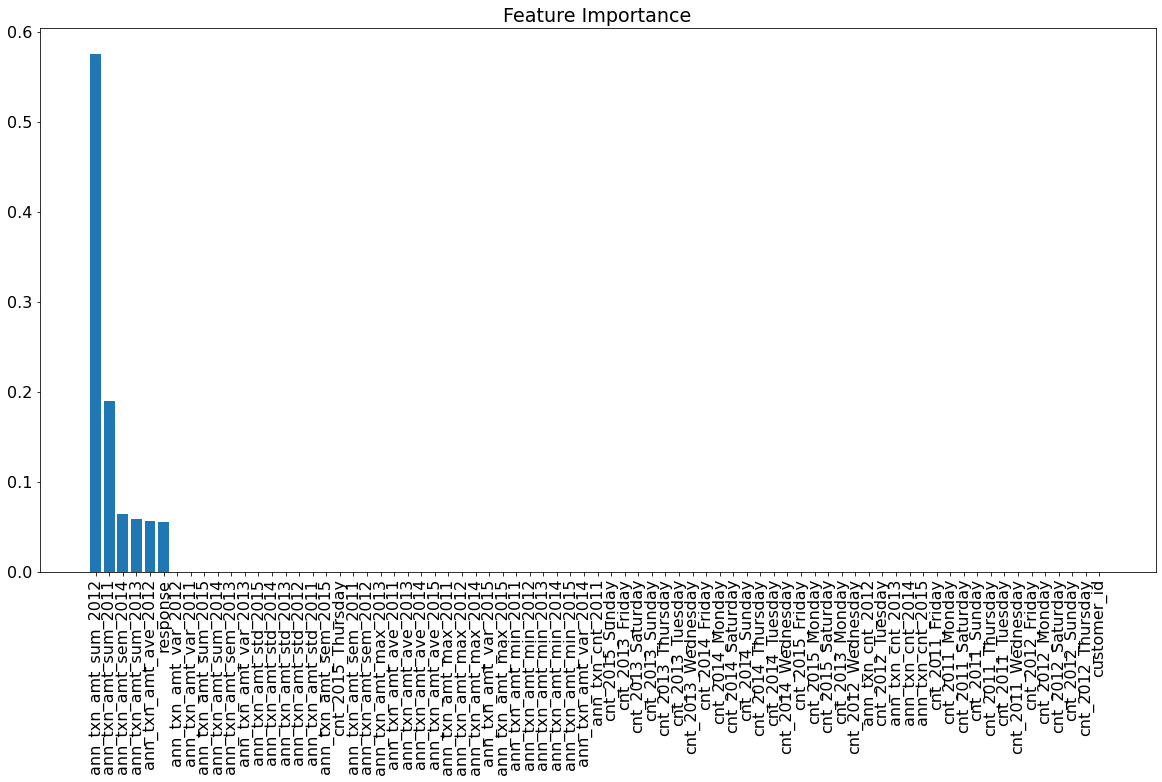

In [62]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [annual_features_outputs.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_ann.shape[1] - 1), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_ann.shape[1] - 1), names, rotation=90)
# Show plot
plt.show()

#### 6. Plot probability distribution for test set.

In [63]:
y_test_proba = model_dt.predict_proba(X_test_annual_scaled)
y_test_proba

array([[0.98858447, 0.01141553],
       [0.87541345, 0.12458655],
       [0.87541345, 0.12458655],
       ...,
       [0.93157895, 0.06842105],
       [0.98858447, 0.01141553],
       [1.        , 0.        ]])

In [64]:
np.mean(y_test_proba[:,1])

0.08468031037010497

Text(-1.8449999999999989, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

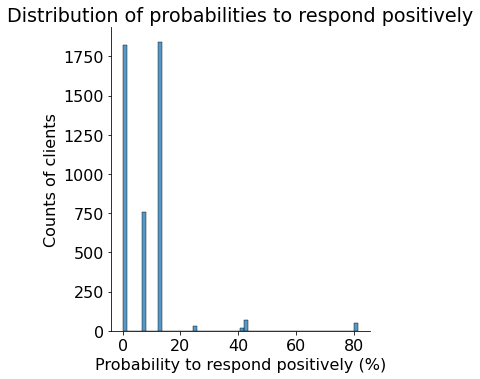

In [65]:
plt.figure(figsize=(5,5))
sns.displot(data = y_test_proba[:,0], x = 100*y_test_proba[:,1])
plt.title('Distribution of probabilities to respond positively')
plt.xlabel('Probability to respond positively (%)')
plt.ylabel('Counts of clients')

#### 7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

##### train set - confusion matrix

In [66]:
y_train_predicted = model_dt.predict(X_train_annual_scaled)
y_train_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [67]:
cm = confusion_matrix(y_train_annual, y_train_predicted)
print(cm)

[[2093    5]
 [ 174   22]]


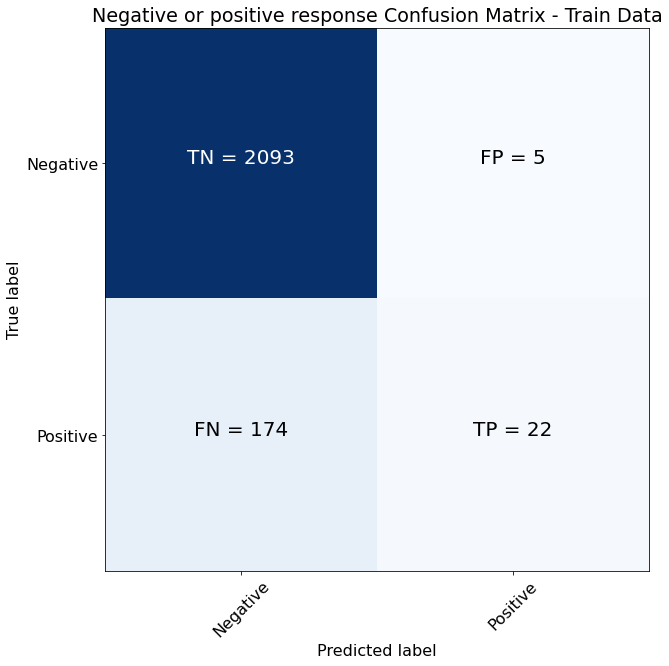

In [68]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Negative or positive response Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

##### train set - precision and recall

In [69]:
print(classification_report(y_train_annual, y_train_predicted, target_names = ['Negative response', 'Positive response']))

                   precision    recall  f1-score   support

Negative response       0.92      1.00      0.96      2098
Positive response       0.81      0.11      0.20       196

         accuracy                           0.92      2294
        macro avg       0.87      0.55      0.58      2294
     weighted avg       0.91      0.92      0.89      2294



##### test set - confusion matrix

In [70]:
y_test_predicted = model_dt.predict(X_test_annual_scaled)
y_test_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [71]:
cm = confusion_matrix(y_test_annual, y_test_predicted)
print(cm)

[[4108   31]
 [ 431   20]]


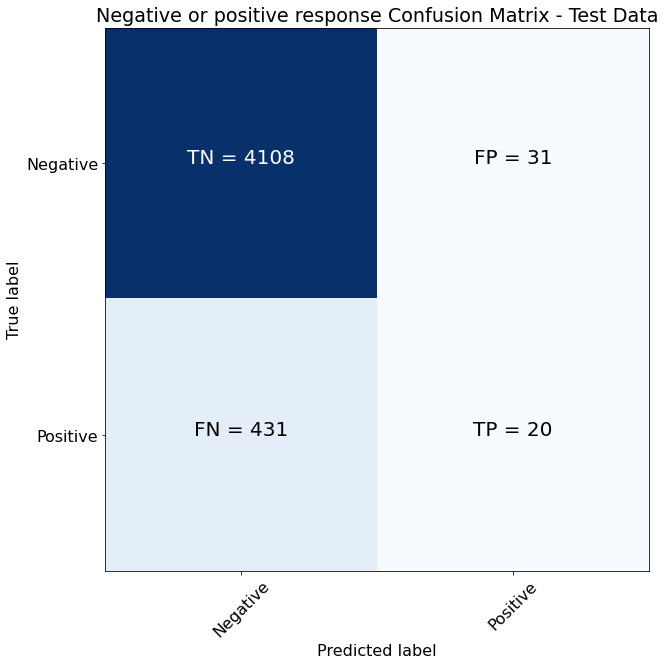

In [72]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Negative or positive response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

##### test set - precision and recall

In [73]:
print(classification_report(y_test_annual, y_test_predicted, target_names = ['Negative response', 'Positive response']))

                   precision    recall  f1-score   support

Negative response       0.91      0.99      0.95      4139
Positive response       0.39      0.04      0.08       451

         accuracy                           0.90      4590
        macro avg       0.65      0.52      0.51      4590
     weighted avg       0.85      0.90      0.86      4590



##### ROC curve

In [74]:
# Scores for train set
scores_train = model_dt.predict_proba(X_train_annual_scaled)[:, 1]
# Scores for test set
scores_test = model_dt.predict_proba(X_test_annual_scaled)[:, 1]

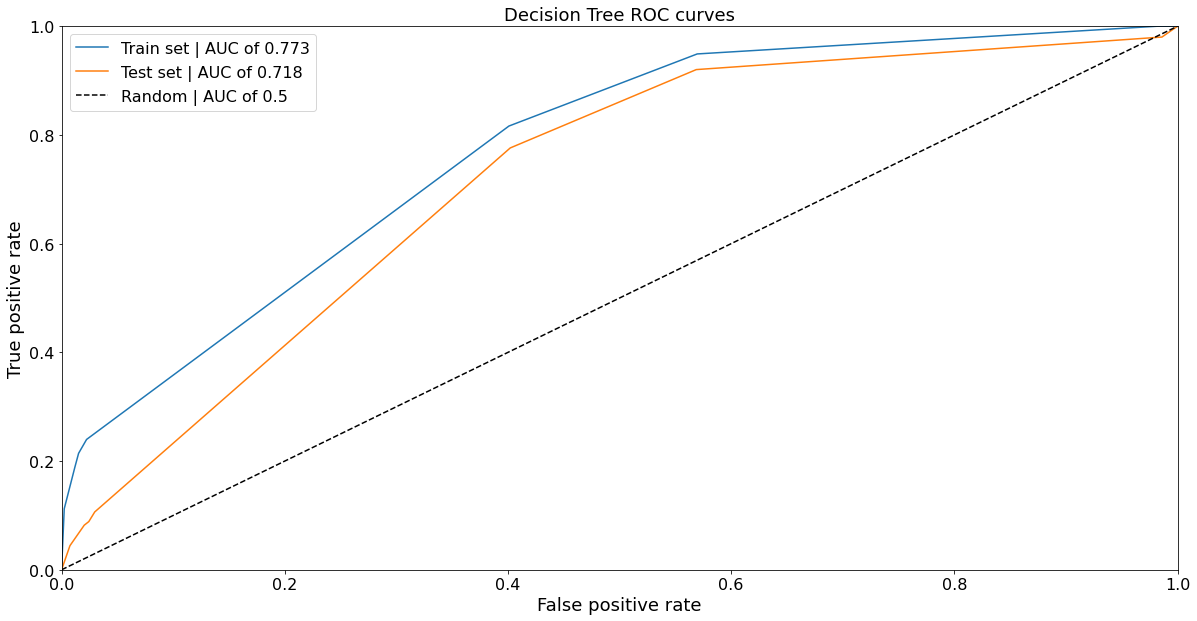

In [75]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

#### 8. Plot decision boundary for top 2 features.

In [76]:
names[:2]

['ann_txn_amt_sum_2012', 'ann_txn_amt_sum_2011']

#### The top 2 features are *ann_txn_amt_sum_2012* and *ann_txn_amt_sum_2011*, by Feature Importance plot.

In [77]:
np.argsort(importances, axis=0)[-2:]

array([27, 28])

In [78]:
X_train_annual_scaled.min(axis=0)[28]

-1.755266718463368

In [79]:
X_train_annual_scaled.max(axis=0)[28]

3.824668181429266

In [80]:
X_train_annual_scaled.min(axis=0)[27]

-1.6977424959358869

In [81]:
X_train_annual_scaled.max(axis=0)[27]

5.53912436943854

In [82]:
xx, yy = np.mgrid[-2:4:3/4, -2:6:4/3] # The steps 1.33 and 0.75 were selected to create a 6x6 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 6x6

# np.ones is a table full of ones with 100x23 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((48, 75)) * np.median(X_train_annual_scaled, axis=0) 
pd.DataFrame(median_inputs).iloc[:10, 20:30] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

(48, 2)


,20,21,22,23,24,25,26,27,28,29
0,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893
1,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893
2,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893
3,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893
4,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893
5,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893
6,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893
7,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893
8,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893
9,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893


In [83]:
# Then, we replace the 28th and 27th column with the values of the grid
median_inputs[:,28] = grid[:,0]
median_inputs[:,27] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:10, 20:30] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 28)|(x.name == 27)  else '' for i in x])

,20,21,22,23,24,25,26,27,28,29
0,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-2.000000,-2.000000,-0.218893
1,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.666667,-2.000000,-0.218893
2,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,0.666667,-2.000000,-0.218893
3,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,2.000000,-2.000000,-0.218893
4,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,3.333333,-2.000000,-0.218893
5,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,4.666667,-2.000000,-0.218893
6,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-2.000000,-1.250000,-0.218893
7,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,-0.666667,-1.250000,-0.218893
8,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,0.666667,-1.250000,-0.218893
9,0.112162,0.149067,0.128105,0.119628,-0.466629,-0.151112,-0.112405,2.000000,-1.250000,-0.218893


In [84]:
probs = model_dt.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[None,
 (-2.0, 4.0),
 (-2.0, 6.0),
 Text(0.5, 0, 'ann_txn_amt_sum_2012'),
 Text(0, 0.5, 'ann_txn_amt_sum_2011')]

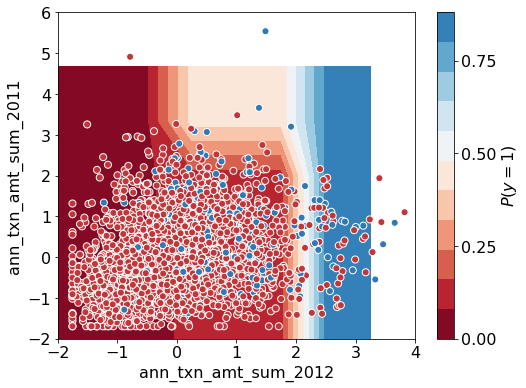

In [85]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 10, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual_scaled[50:, 28], X_train_annual_scaled[50:, 27], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 4), ylim=(-2, 6),
       xlabel="ann_txn_amt_sum_2012", ylabel="ann_txn_amt_sum_2011")

### Annual Features - Random Forests

In [86]:
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(2, 8)
estimator_max_depth = []
accuracy_normalized = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(RandomForestClassifier(n_estimators = 50, max_depth = i, random_state=1147, class_weight = 'balanced'))
    estimator_max_depth[i-2].fit(X_train_annual_scaled, y_train_annual)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-2].predict_proba(X_train_annual_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-2].predict_proba(X_test_annual_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-2].predict(X_test_annual_scaled)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_annual, y_test_predicted, normalize = True))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [87]:
performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 2
performance_df

,ACCURACY,AUC_TRAIN,AUC_TEST,MAX_DEPTH
0,65.664488,0.799087,0.739519,2
1,67.015251,0.830441,0.741667,3
2,70.392157,0.866717,0.740577,4
3,73.965142,0.900868,0.742913,5
4,77.363834,0.937951,0.742743,6
5,79.433551,0.963612,0.743150,7


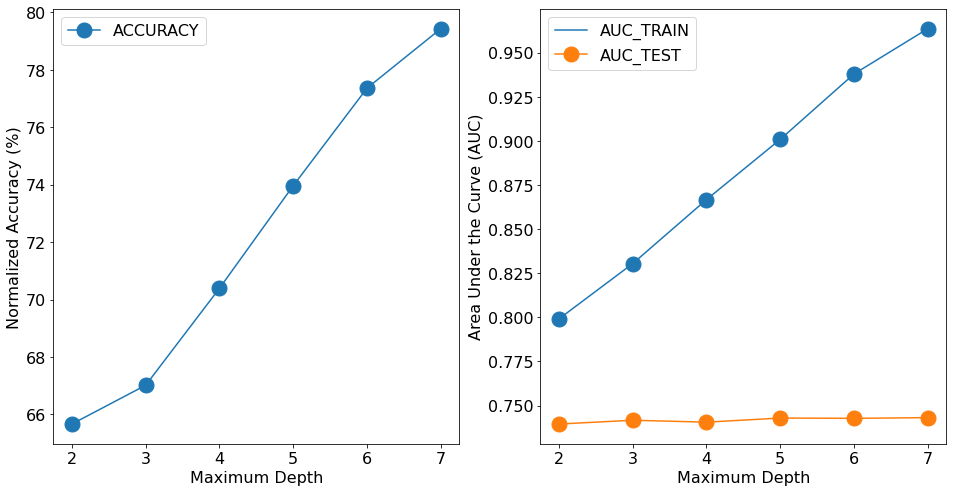

In [88]:
fig_1 = plt.figure(figsize=(16,8))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'ACCURACY', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("Normalized Accuracy (%)")
ax1.set_xlabel("Maximum Depth")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

##### I will select maximum depth of 6, since AUC for test set will decrease if we increase maximum depth, and cause the model to be complicated.

In [89]:
# Define and fit
estimator     = RandomForestClassifier(random_state=1147, n_estimators = 200, max_depth = 6, class_weight = 'balanced')
rf_best_model = estimator.fit(X_train_annual_scaled, y_train_annual)
# Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
scores_train = rf_best_model.predict_proba(X_train_annual_scaled)[:,1] 
scores_test  = rf_best_model.predict_proba(X_test_annual_scaled)[:,1]  
# Predict the class of test set
y_test_predicted = rf_best_model.predict(X_test_annual_scaled)
# Calculate accuracy at every iteration and append
accuracy = 100*accuracy_score(y_test_annual, y_test_predicted, normalize = True)
# ROC Calc Train set 
fpr_train, tpr_train, _ = roc_curve(y_train_annual, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_annual, scores_test)
# Calculate the AUCs
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

#### 5. Plot coeffcient values or feature importance.

In [90]:
# Calculate feature importances
importances = rf_best_model.feature_importances_
importances

array([0.01627433, 0.01951733, 0.03154863, 0.03274913, 0.01166165,
       0.01184626, 0.01426626, 0.03171499, 0.03490022, 0.00894818,
       0.01503676, 0.02294236, 0.02055947, 0.02333031, 0.01130974,
       0.00861906, 0.01773623, 0.02349682, 0.03520349, 0.00528908,
       0.00753371, 0.01487297, 0.02189685, 0.02430213, 0.00571987,
       0.0117932 , 0.01425244, 0.07112283, 0.10730966, 0.00879686,
       0.00772143, 0.01412714, 0.02330718, 0.02527964, 0.0047541 ,
       0.0041177 , 0.00526721, 0.02433086, 0.07883582, 0.00375531,
       0.00206812, 0.00260592, 0.00292853, 0.00283363, 0.00214914,
       0.00255597, 0.00115915, 0.00250705, 0.00444407, 0.0034879 ,
       0.00290782, 0.00290986, 0.00246525, 0.00260625, 0.00348925,
       0.00478215, 0.00304856, 0.00707282, 0.00343351, 0.00309952,
       0.00402903, 0.00474628, 0.00439539, 0.00338606, 0.01742265,
       0.00664135, 0.00345417, 0.01010005, 0.00242025, 0.00074465,
       0.00066023, 0.00048273, 0.00151748, 0.00060827, 0.00078

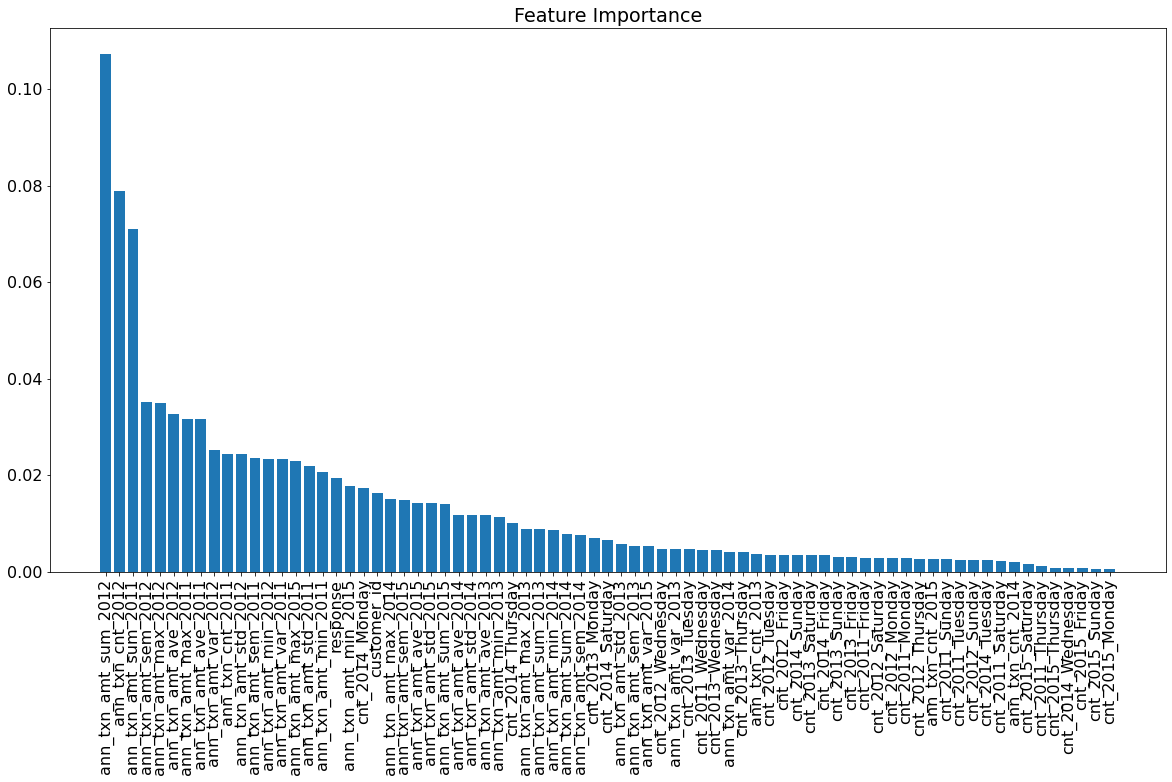

In [91]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [annual_features_outputs.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_ann.shape[1] - 1), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_ann.shape[1] - 1), names, rotation=90)
# Show plot
plt.show()

#### 6. Plot probability distribution for test set.

Text(8.280000000000001, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

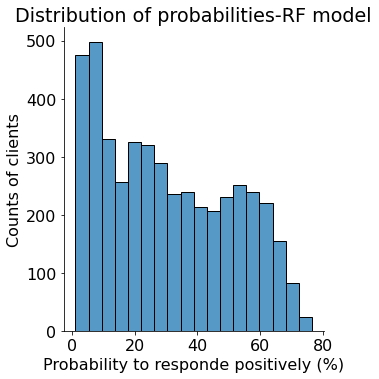

In [92]:
plt.figure(figsize=(5,5))
sns.displot(data = scores_test, x = 100*scores_test)
plt.title('Distribution of probabilities-RF model')
plt.xlabel('Probability to responde positively (%)')
plt.ylabel('Counts of clients')

In [93]:
np.mean(scores_test)

0.3044452368847223

#### 7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

##### test data - confusion matrix

In [94]:
cm = confusion_matrix(y_test_annual, y_test_predicted)
print(cm)

[[3310  829]
 [ 232  219]]


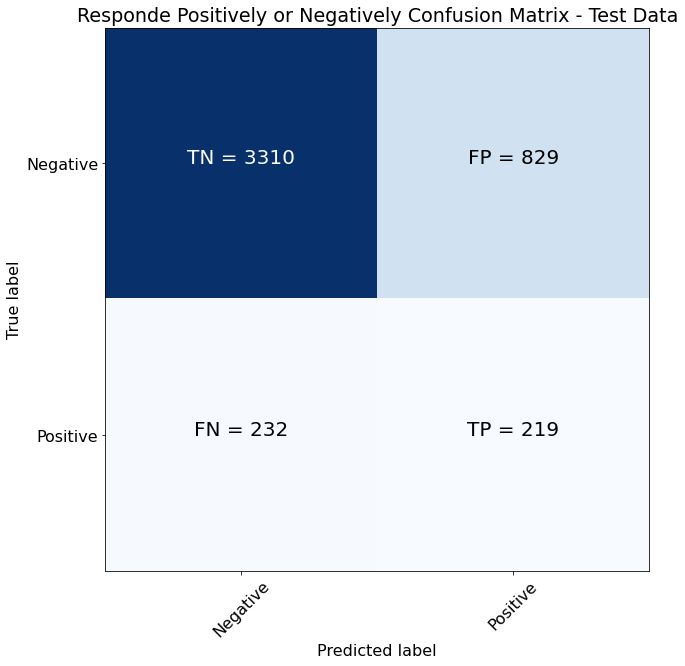

In [95]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Responde Positively or Negatively Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

##### test data - precision and recall

In [96]:
print(classification_report(y_test_annual, y_test_predicted, target_names = ['Negative response', 'Positive response']))

                   precision    recall  f1-score   support

Negative response       0.93      0.80      0.86      4139
Positive response       0.21      0.49      0.29       451

         accuracy                           0.77      4590
        macro avg       0.57      0.64      0.58      4590
     weighted avg       0.86      0.77      0.81      4590



##### ROC Curve

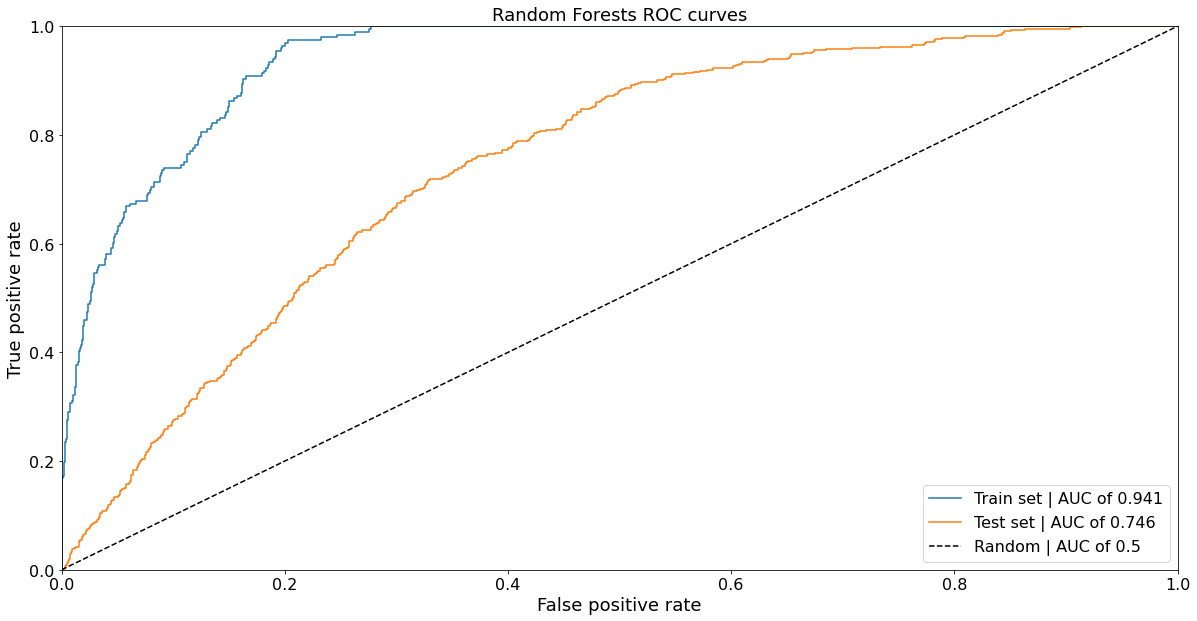

In [97]:
# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Random Forests ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

#### 8. Plot decision boundary for top 2 features.

In [98]:
names[:2]

['ann_txn_amt_sum_2012', 'ann_txn_cnt_2012']

In [99]:
np.argsort(importances, axis=0)[-2:]

array([38, 28])

In [100]:
X_train_annual_scaled.min(axis=0)[28]

-1.755266718463368

In [101]:
X_train_annual_scaled.max(axis=0)[28]

3.824668181429266

In [102]:
X_train_annual_scaled.min(axis=0)[38]

-2.0870367135984464

In [103]:
X_train_annual_scaled.max(axis=0)[38]

3.6694938887815822

In [104]:
xx, yy = np.mgrid[-2:5:0.5, -3:4:0.5] # The steps 0.5 and 0.5 were selected to create a 14x14 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 14x14

# np.ones is a table full of ones with 196x75 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((196, 75)) * np.median(X_train_annual_scaled, axis=0) 
pd.DataFrame(median_inputs).iloc[:10, 25:40] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

(196, 2)


,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.01691,-0.292639,0.096226,-0.315797,0.011929
1,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.01691,-0.292639,0.096226,-0.315797,0.011929
2,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.01691,-0.292639,0.096226,-0.315797,0.011929
3,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.01691,-0.292639,0.096226,-0.315797,0.011929
4,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.01691,-0.292639,0.096226,-0.315797,0.011929
5,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.01691,-0.292639,0.096226,-0.315797,0.011929
6,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.01691,-0.292639,0.096226,-0.315797,0.011929
7,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.01691,-0.292639,0.096226,-0.315797,0.011929
8,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.01691,-0.292639,0.096226,-0.315797,0.011929
9,-0.151112,-0.112405,-0.117941,-0.122534,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.01691,-0.292639,0.096226,-0.315797,0.011929


In [105]:
# Then, we replace the 15th and 14th column with the values of the grid
median_inputs[:,28] = grid[:,0]
median_inputs[:,38] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:10, 25:40] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 28)|(x.name == 38)  else '' for i in x])

,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
0,-0.151112,-0.112405,-0.117941,-2.000000,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.016910,-0.292639,0.096226,-3.000000,0.011929
1,-0.151112,-0.112405,-0.117941,-2.000000,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.016910,-0.292639,0.096226,-2.500000,0.011929
2,-0.151112,-0.112405,-0.117941,-2.000000,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.016910,-0.292639,0.096226,-2.000000,0.011929
3,-0.151112,-0.112405,-0.117941,-2.000000,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.016910,-0.292639,0.096226,-1.500000,0.011929
4,-0.151112,-0.112405,-0.117941,-2.000000,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.016910,-0.292639,0.096226,-1.000000,0.011929
5,-0.151112,-0.112405,-0.117941,-2.000000,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.016910,-0.292639,0.096226,-0.500000,0.011929
6,-0.151112,-0.112405,-0.117941,-2.000000,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.016910,-0.292639,0.096226,0.000000,0.011929
7,-0.151112,-0.112405,-0.117941,-2.000000,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.016910,-0.292639,0.096226,0.500000,0.011929
8,-0.151112,-0.112405,-0.117941,-2.000000,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.016910,-0.292639,0.096226,1.000000,0.011929
9,-0.151112,-0.112405,-0.117941,-2.000000,-0.218893,-0.232316,-0.076308,-0.103054,-0.097714,-0.358583,0.016910,-0.292639,0.096226,1.500000,0.011929


In [106]:
probs = rf_best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[None,
 (-3.0, 5.0),
 (-2.0, 4.0),
 Text(0.5, 0, 'ann_txn_amt_sum_2012'),
 Text(0, 0.5, 'ann_txn_cnt_2012')]

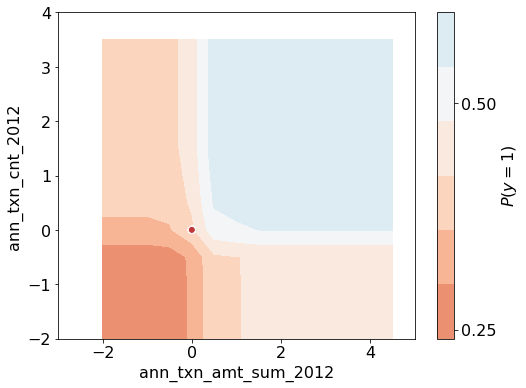

In [107]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 5, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_annual.iloc[50:, 28], X_train_annual.iloc[50:, 38], c=y_train_annual[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-3, 5), ylim=(-2, 4),
       xlabel="ann_txn_amt_sum_2012", ylabel="ann_txn_cnt_2012")

### Monthly Features - Logistic Regression

#### 1. Separate the inputs X and the output y in two data frames.

In [108]:
X_mth = monthly_features_outputs.drop(['response'], axis = 1)
y_mth = monthly_features_outputs['response']

#### 2. Split the data in train and test set.

In [109]:
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_mth, y_mth, test_size=2/3, random_state=1147)

#### 3. Pre-process.

In [110]:
X_train_monthly.fillna(0, inplace = True)
y_train_monthly.fillna(0, inplace = True)

In [111]:
X_train_monthly_scaled = scaler.fit_transform(X_train_monthly.iloc[:, 2:])
X_train_monthly_scaled.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [220]:
X_test_monthly_scaled = scaler.transform(X_test_monthly.iloc[:, 2:])

In [113]:
X_train_monthly_scaled = np.nan_to_num(X_train_monthly_scaled)

In [222]:
X_test_monthly_scaled = np.nan_to_num(X_test_monthly_scaled)

In [223]:
X_test_monthly_scaled

array([[-0.57802857, -0.61910376,  1.23710308, ..., -0.23577711,
        -0.23597749, -0.38579782],
       [ 0.3439867 ,  0.98297224,  0.39423478, ..., -0.23577711,
         3.96576203, -0.7777616 ],
       [-0.57802857, -0.61910376, -0.14213595, ..., -0.23577711,
        -0.23597749, -0.33353598],
       ...,
       [-0.11702094,  0.98297224, -0.67850668, ..., -0.23577711,
        -0.23597749, -0.64710701],
       [-0.57802857, -0.61910376, -0.93392132, ..., -0.23577711,
        -0.23597749,  0.75089714],
       [-0.57802857, -0.61910376, -0.93392132, ..., -0.23577711,
        -0.23597749,  1.06446817]])

#### 4. Fit the training dataset and optimize the hyperparameters of the method.

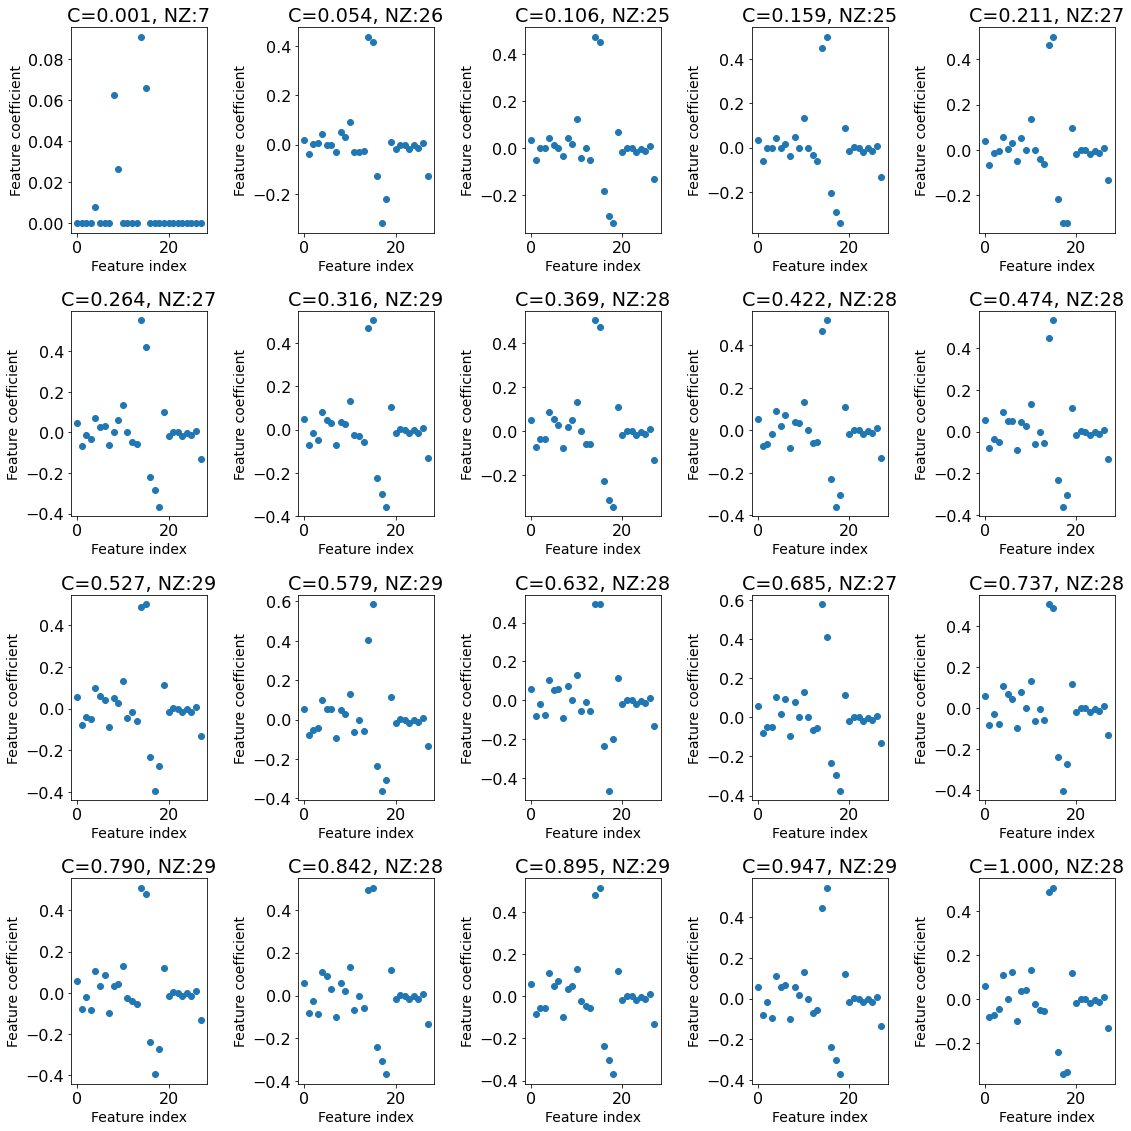

In [116]:
C = np.linspace(0.001, 1, 20)
# Smaller values, stronger regularization, more coefficients will go to zero

# Initialize the variables you want to save in an iterative manner
count                     = -1
Train_AUC_iter_LR         = np.zeros(shape=(len(C),1))
Test_AUC_iter_LR          = np.zeros(shape=(len(C),1))
NonZeroCoeff_LR           = np.zeros(shape=(len(C),1))
Model_Coeff_LR            = np.zeros(shape=(X_mth.shape[1] - 2, len(C)))

fig = plt.figure(figsize=(16, 16))

for c in C:
    count += 1
    # instantiate a logistic regression model, and fit with X and y
    model_LR = LogisticRegression(C=c, penalty='l1', solver="liblinear")
    # Fit the model
    model_LR.fit(X_train_monthly_scaled, y_train_monthly)
    Model_Coeff_LR[:,count] = model_LR.coef_[0,:]
    # Scores for train set
    scores_train_LR = model_LR.predict_proba(X_train_monthly_scaled)[:, 1]
    # Scores for test set
    scores_test_LR = model_LR.predict_proba(X_test_monthly_scaled)[:, 1]
    
    # ============================ #
    # === [Train: ROC and AUC] === #
    # ============================ #
    # ROC Calc
    fpr_train_LR, tpr_train_LR, _ = roc_curve(y_train_monthly, scores_train_LR)
    # AUC Calc
    auc_train_LR = auc(fpr_train_LR, tpr_train_LR)
    Train_AUC_iter_LR[count,0] = auc_train_LR
    # ============================ #
    # === [Test: ROC and AUC] === #
    # ============================ #
    # ROC Calc
    fpr_test_LR, tpr_test_LR, _ = roc_curve(y_test_monthly, scores_test_LR)
    # AUC Calc
    auc_test_LR = auc(fpr_test_LR, tpr_test_LR)
    Test_AUC_iter_LR[count,0] = auc_test_LR
    ### Extract the count of non-zero coefficients
    NonZeroCoeff_LR[count,0] = X_mth.shape[1] - (model_LR.coef_ == 0).sum()
    
    x = model_LR.coef_.transpose()   
    index = np.arange(len(x))  
    
    ax = fig.add_subplot(4,5,count+1)
    ax.scatter(index, x)
    ax.set_title('C=%.3f, NZ:%s' %(c,X_mth.shape[1]-(model_LR.coef_ == 0).sum()))
    ax.set_xlabel('Feature index', fontsize = 14)
    ax.set_ylabel('Feature coefficient', fontsize = 14)
plt.tight_layout()    
plt.show()

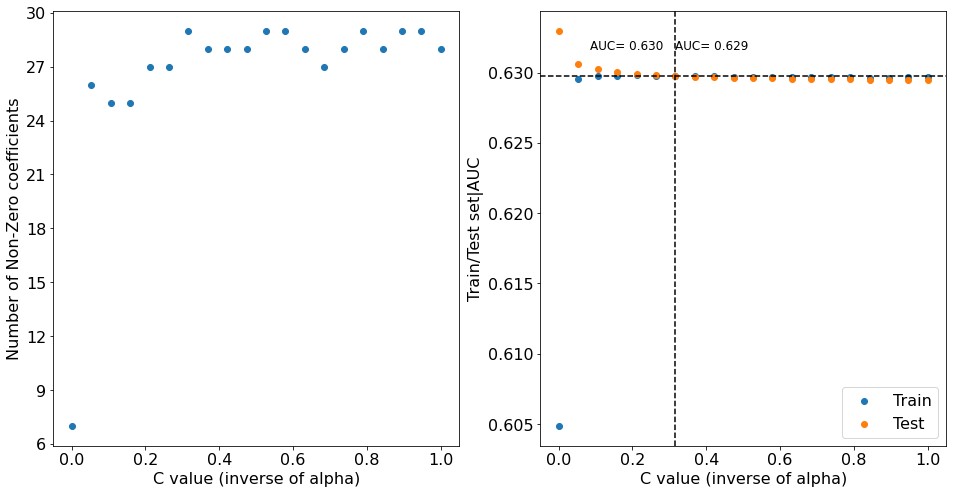

In [117]:
# Plot of the NonZero coefficients    
fig = plt.figure(figsize=(16, 8))
sub1 = fig.add_subplot(121)
plt.scatter(C, NonZeroCoeff_LR)
sub1.set_ylabel('Number of Non-Zero coefficients')
sub1.set_xlabel('C value (inverse of alpha)')
sub1.yaxis.set_major_locator(MaxNLocator(integer=True))
# sub1.set_xlim(0.01,1)
# plt.xscale('log')
# plt.show()

sub2 = fig.add_subplot(122)
plt.scatter(C, Train_AUC_iter_LR)
plt.scatter(C, Test_AUC_iter_LR)
sub2.set_xlabel('C value (inverse of alpha)')
sub2.set_ylabel('Train/Test set|AUC')
# sub1.set_xlim(0.02,0.06)
plt.annotate('AUC= %0.3f' %(Test_AUC_iter_LR[19]), xy=(C[6], 1.003*Test_AUC_iter_LR[6]), xycoords='data',horizontalalignment= 'left', fontsize = 12)
plt.annotate('AUC= %0.3f' %(Train_AUC_iter_LR[5]), xy=(0.9*C[6], 1.003*Train_AUC_iter_LR[6]), xycoords='data',horizontalalignment= 'right', fontsize = 12)
plt.legend(['Train','Test'], loc ='lower right')
plt.axhline(Test_AUC_iter_LR[6], color = 'k', linestyle = '--')
plt.axvline(C[6], color = 'k', linestyle = '--')
# plt.plot([C[8],C[8]],[plt.ylim()[0],Test_AUC_iter_LR[8]])
# plt.xscale('log')

plt.show()

##### I will choose C = 0.316. By the left graph, 0.316 is the smallest C value among all 20 C value choices that has the highest number of non-zero coefficients. Also, by the right graph, AUC for train set will not increase as much as the decline in AUC for test set if we increase C value. Thus, I will set C = 0.316.

In [118]:
LogReg = LogisticRegression(penalty='l1', solver="liblinear", C=0.316)
LogReg.fit(X_train_monthly_scaled, y_train_monthly)
m = LogReg.coef_
b = LogReg.intercept_
m

array([[ 0.0485326 , -0.07221381, -0.0234177 , -0.03748723,  0.07888793,
         0.01937353,  0.05421597, -0.07229201,  0.04208851,  0.0217013 ,
         0.13300599, -0.03893543, -0.01515042, -0.05870186,  0.43292151,
         0.54369753, -0.22501286, -0.31021493, -0.34834774,  0.10626867,
        -0.0176353 ,  0.00174725,  0.        , -0.01825338, -0.00320882,
        -0.01397233,  0.00881056, -0.13213153]])

#### 5. Plot coeffcient values or feature importance.

In [119]:
max(m[0])

0.5436975263050461

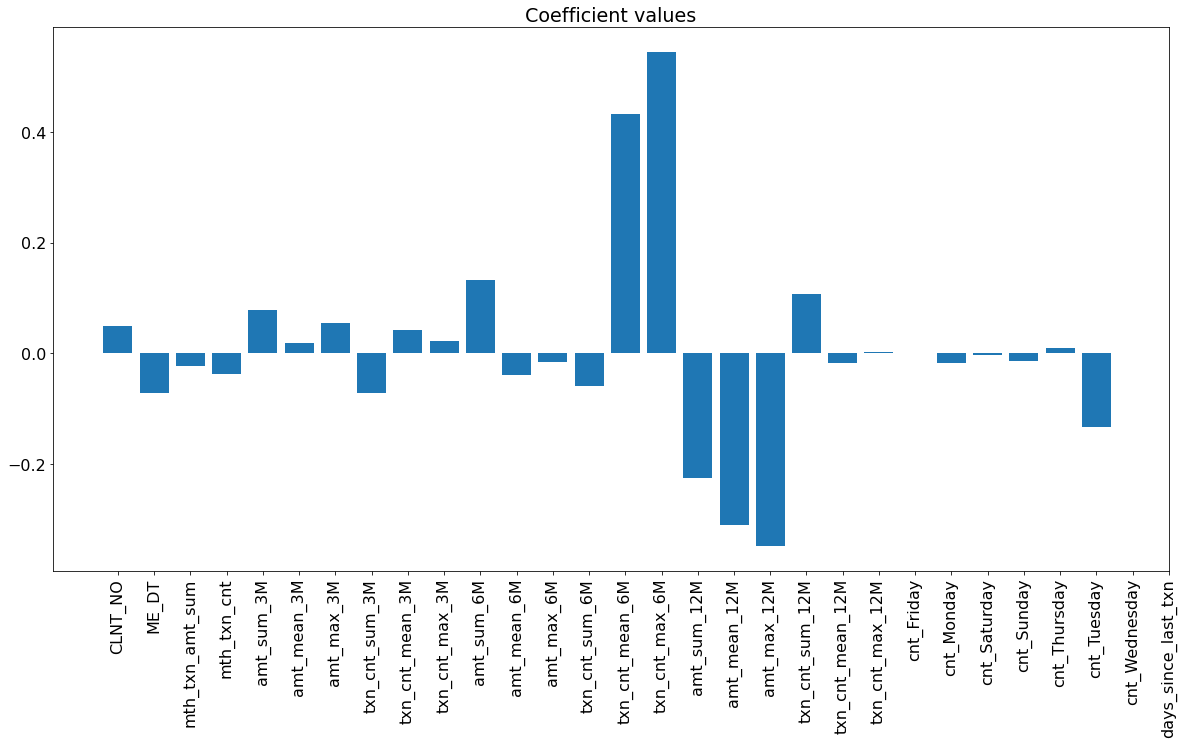

In [120]:
matplotlib.rcParams['figure.figsize'] = (20, 10)
plt.figure()
plt.title("Coefficient values")
plt.bar(range(X_mth.shape[1] - 2), m[0])
plt.xticks(range(X_mth.shape[1]), X_mth.columns, rotation=90)
plt.show()

#### 6. Plot probability distribution for test set.

In [121]:
y_test_proba = LogReg.predict_proba(X_test_monthly_scaled)
y_test_proba

array([[0.90765881, 0.09234119],
       [0.88842954, 0.11157046],
       [0.9160822 , 0.0839178 ],
       ...,
       [0.93939978, 0.06060022],
       [0.94275925, 0.05724075],
       [0.95983853, 0.04016147]])

In [122]:
np.mean(y_test_proba[:,1])

0.09677662063939145

Text(-11.969999999999999, 0.5, 'Counts of clients')

<Figure size 1440x720 with 0 Axes>

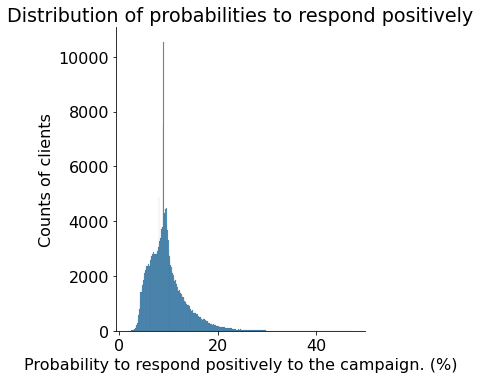

In [123]:
plt.figure(figsize=(20,10))
sns.displot(data = y_test_proba[:,1], x = 100*y_test_proba[:,1])
plt.title('Distribution of probabilities to respond positively')
plt.xlabel('Probability to respond positively to the campaign. (%)')
plt.ylabel('Counts of clients')

#### 7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

##### train data - confusion matrix

In [124]:
y_train_predicted = LogReg.predict(X_train_monthly_scaled)
y_train_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [125]:
cm = confusion_matrix(y_train_monthly, y_train_predicted)
print(cm)

[[97742     0]
 [10107     0]]


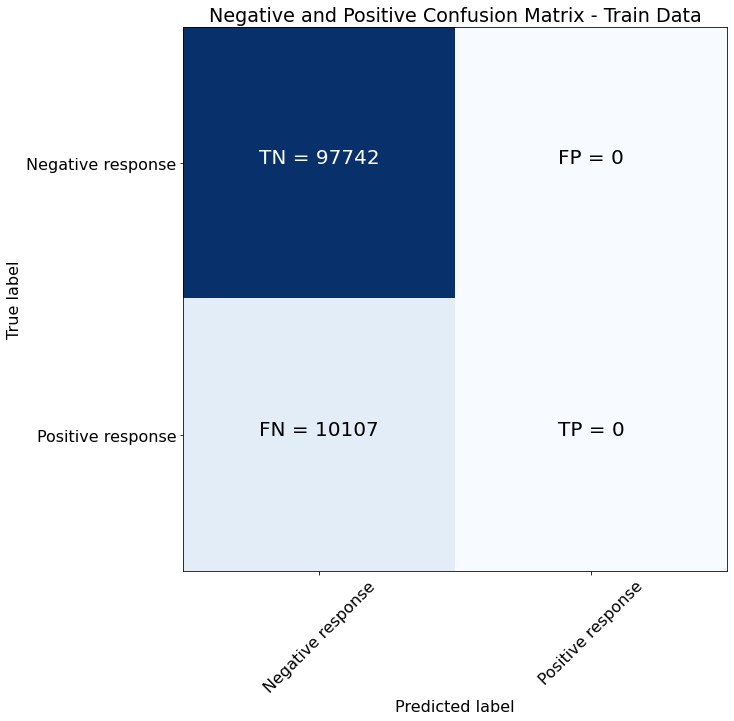

In [126]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative response','Positive response']
plt.title('Negative and Positive Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

##### train data - precision and recall

In [127]:
print(classification_report(y_train_monthly, y_train_predicted, target_names = ['Negative response', 'Positive response']))

                   precision    recall  f1-score   support

Negative response       0.91      1.00      0.95     97742
Positive response       0.00      0.00      0.00     10107

         accuracy                           0.91    107849
        macro avg       0.45      0.50      0.48    107849
     weighted avg       0.82      0.91      0.86    107849



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### test data - confusion matrix

In [128]:
y_test_predicted = LogReg.predict(X_test_monthly_scaled)
y_test_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
cm = confusion_matrix(y_test_monthly, y_test_predicted)
print(cm)

[[195397      0]
 [ 20302      0]]


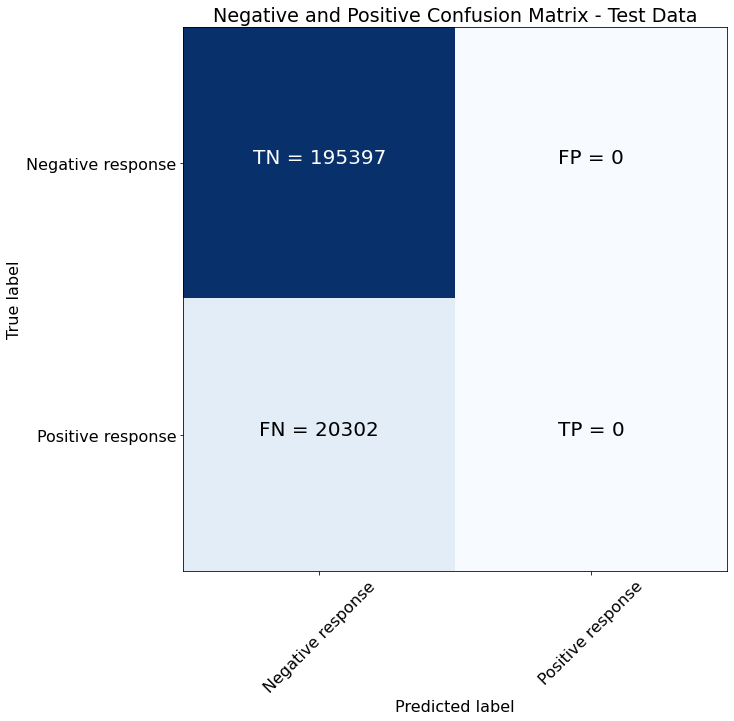

In [130]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative response','Positive response']
plt.title('Negative and Positive Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [131]:
print(classification_report(y_test_monthly, y_test_predicted, target_names = ['Negative response', 'Positive response']))

                   precision    recall  f1-score   support

Negative response       0.91      1.00      0.95    195397
Positive response       0.00      0.00      0.00     20302

         accuracy                           0.91    215699
        macro avg       0.45      0.50      0.48    215699
     weighted avg       0.82      0.91      0.86    215699



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### ROC curve

In [132]:
# Scores for train set
scores_train = LogReg.predict_proba(X_train_monthly_scaled)[:, 1]
# Scores for test set
scores_test = LogReg.predict_proba(X_test_monthly_scaled)[:, 1]

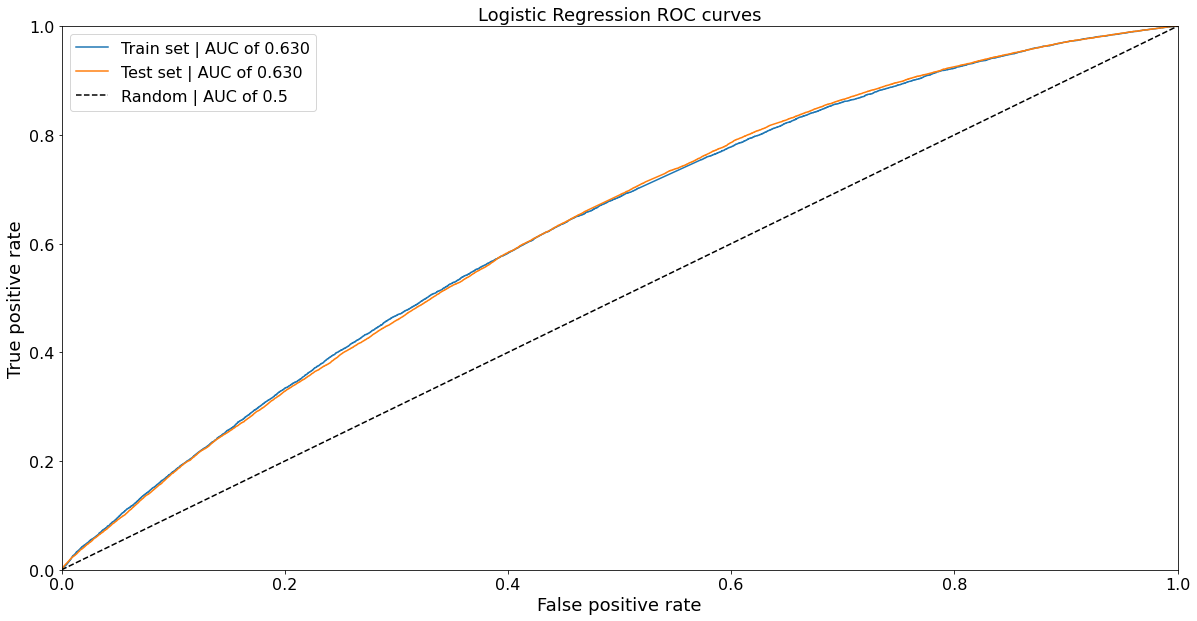

In [133]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Logistic Regression ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

##### Plot decision boundary for top 2 features.

In [134]:
np.argsort(np.max(m, axis=0))[-2:]

array([14, 15])

In [135]:
X_train_monthly.columns[14]

'txn_cnt_mean_6M'

In [136]:
X_train_monthly.columns[15]

'txn_cnt_max_6M'

In [137]:
X_train_monthly_scaled.min(axis=0)[14]

-1.1658179438201837

In [138]:
X_train_monthly_scaled.max(axis=0)[14]

4.862714417611841

In [139]:
X_train_monthly_scaled.min(axis=0)[15]

-1.1658179438201839

In [140]:
X_train_monthly_scaled.max(axis=0)[15]

4.862714417611843

In [141]:
xx, yy = np.mgrid[-2:6:1/3, -2:6:1/3] # The steps 1/3 and 1/3 were selected to create a 24x24 grid
grid = np.c_[xx.ravel(), yy.ravel()]
grid.shape#.shape # Confirm that grid shape is 24x24

(576, 2)

In [142]:
median_inputs = np.ones((576, 28)) * np.median(X_train_monthly_scaled, axis=0)
pd.DataFrame(median_inputs).iloc[:10, 10:20]

,10,11,12,13,14,15,16,17,18,19
0,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
1,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
2,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
3,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
4,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
5,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
6,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
7,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
8,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
9,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774


In [143]:
median_inputs[:,14] = grid[:,0]
median_inputs[:,15] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:10, 10:20]
df.style.apply(lambda x: ['background: grey' if (x.name == 14)|(x.name == 15)  else '' for i in x])

,10,11,12,13,14,15,16,17,18,19
0,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,-2.000000,0.014035,0.132418,0.132418,-0.250774
1,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,-1.666667,0.014035,0.132418,0.132418,-0.250774
2,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,-1.333333,0.014035,0.132418,0.132418,-0.250774
3,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,-1.000000,0.014035,0.132418,0.132418,-0.250774
4,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,-0.666667,0.014035,0.132418,0.132418,-0.250774
5,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,-0.333333,0.014035,0.132418,0.132418,-0.250774
6,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,0.000000,0.014035,0.132418,0.132418,-0.250774
7,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,0.333333,0.014035,0.132418,0.132418,-0.250774
8,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,0.666667,0.014035,0.132418,0.132418,-0.250774
9,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,1.000000,0.014035,0.132418,0.132418,-0.250774


In [144]:
# Score the artificial data on the grid
probs = LogReg.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[None,
 (-2.0, 6.0),
 (-2.0, 6.0),
 Text(0.5, 0, 'txn_cnt_mean_6M scaled'),
 Text(0, 0.5, 'txn_cnt_max_6M scaled')]

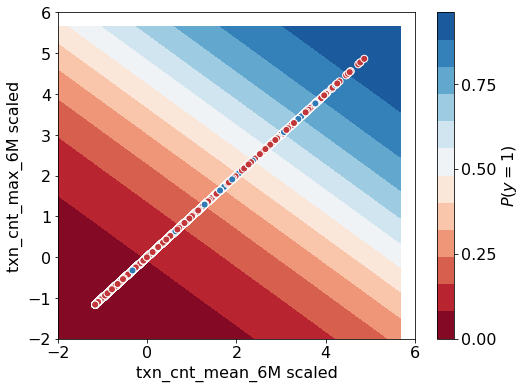

In [145]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 12, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly_scaled[50:, 14], X_train_monthly_scaled[50:, 15], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-0.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 6), ylim=(-2, 6),
       xlabel="txn_cnt_mean_6M scaled", ylabel="txn_cnt_max_6M scaled")

### Monthly feature - Decision tree

#### 4. Fit the training dataset and optimize the hyperparameters of the method.

In [146]:
max_depth_range = range(1, 7)
estimator_max_depth = []
accuracy_normalized = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(DecisionTreeClassifier(random_state=1147, max_depth = i))
    estimator_max_depth[i-1].fit(X_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-1].predict_proba(X_train_monthly_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-1].predict_proba(X_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-1].predict(X_test_monthly_scaled)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_monthly, y_test_predicted, normalize = True))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [147]:
performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 1
performance_df

,ACCURACY,AUC_TRAIN,AUC_TEST,MAX_DEPTH
0,90.587810,0.594127,0.588387,1
1,90.587810,0.619378,0.593007,2
2,90.587810,0.632740,0.623965,3
3,90.588273,0.639305,0.624362,4
4,90.572511,0.644058,0.628662,5
5,90.574365,0.647919,0.630212,6


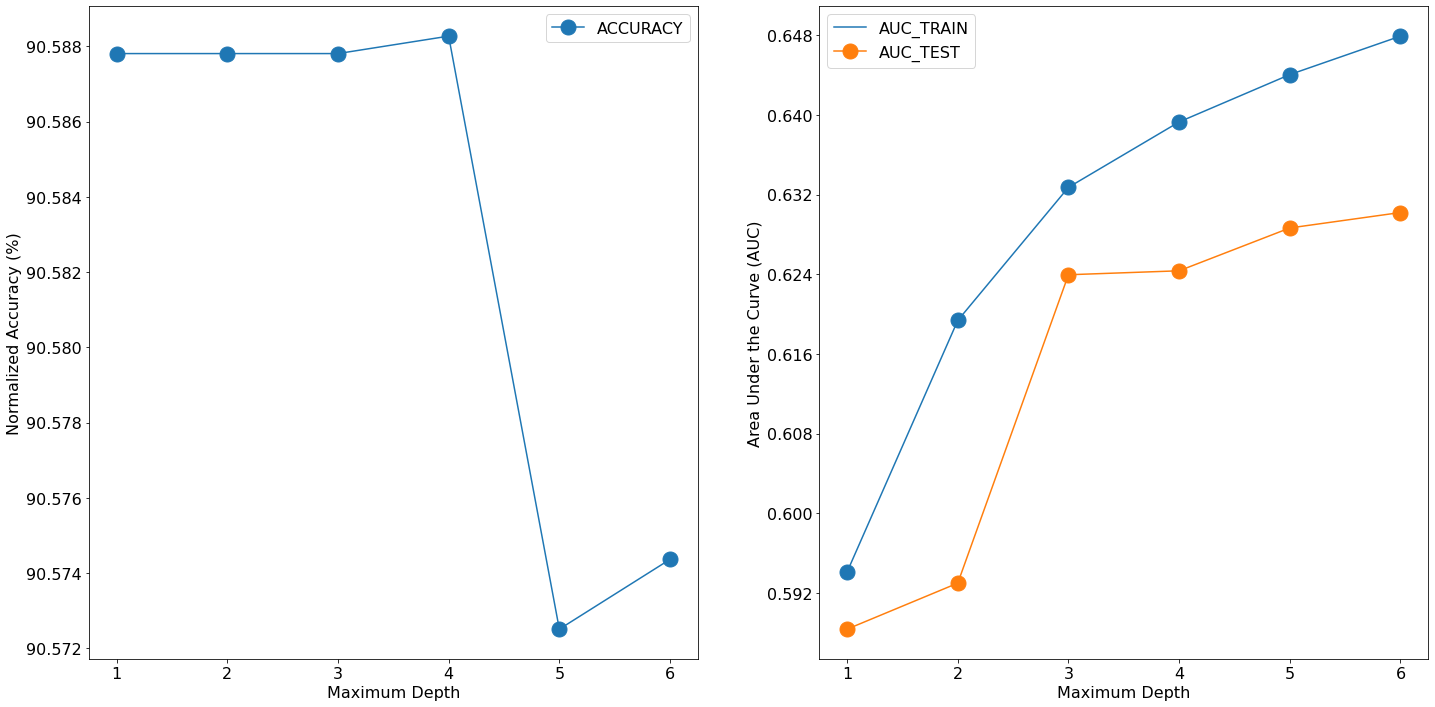

In [148]:
fig_1 = plt.figure(figsize=(24,12))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'ACCURACY', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("Normalized Accuracy (%)")
ax1.set_xlabel("Maximum Depth")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

##### I will choose maximum depth to be 4, since it has the highest accuracy, and high AUC for test set. If we increase maximum depth, accuracy will drop significantly.

In [149]:
estimator = DecisionTreeClassifier(criterion = 'entropy', random_state=1147, max_depth = 4)
model_dt = estimator.fit(X_train_monthly_scaled, y_train_monthly)

#### 5. Plot coeffcient values or feature importance.

In [150]:
importances = model_dt.feature_importances_
importances

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00862859, 0.        , 0.        ,
       0.01552313, 0.        , 0.        , 0.        , 0.04411652,
       0.59493873, 0.30411432, 0.        , 0.00506821, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0276105 ])

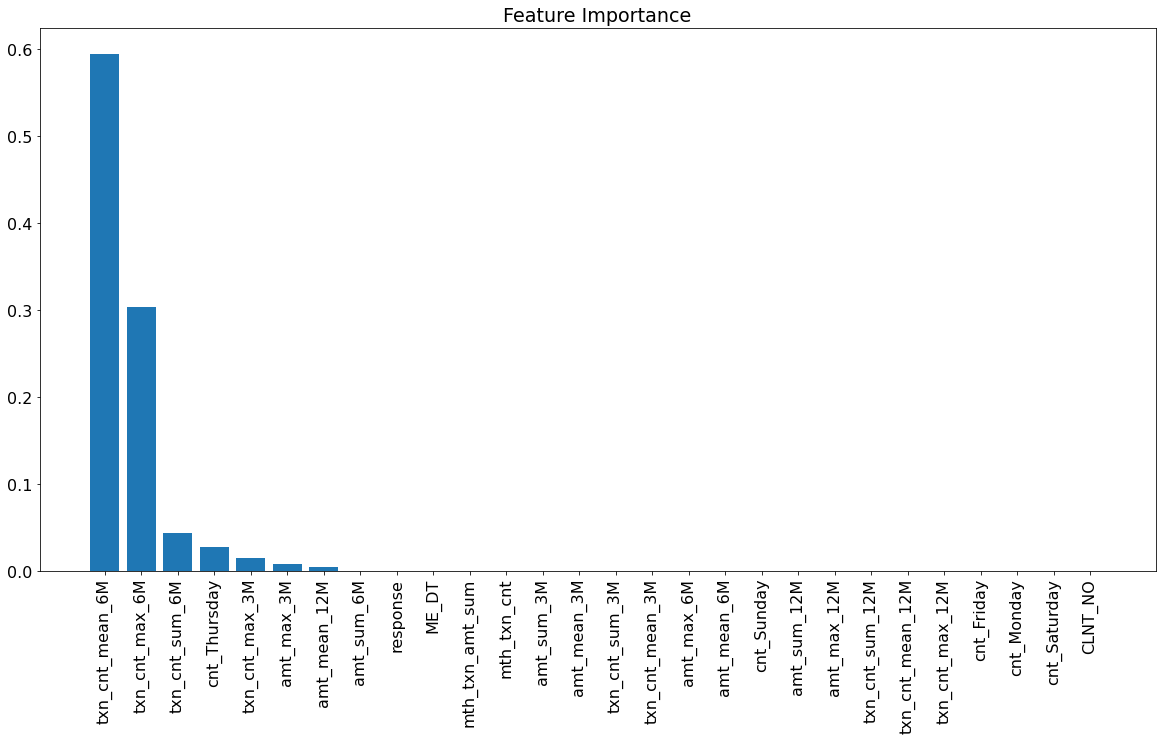

In [151]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [monthly_features_outputs.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_mth.shape[1] - 2), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_mth.shape[1] - 2), names, rotation=90)
# Show plot
plt.show()

In [152]:
y_test_predicted = model_dt.predict(X_test_monthly_scaled)
y_test_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [153]:
y_test_proba = model_dt.predict_proba(X_test_monthly_scaled)
y_test_proba

array([[0.93304475, 0.06695525],
       [0.87176563, 0.12823437],
       [0.95989547, 0.04010453],
       ...,
       [0.98729198, 0.01270802],
       [0.95989547, 0.04010453],
       [0.98729198, 0.01270802]])

In [154]:
np.mean(y_test_proba[:,1])

0.08774865879662103

Text(-11.969999999999999, 0.5, 'Counts of clients')

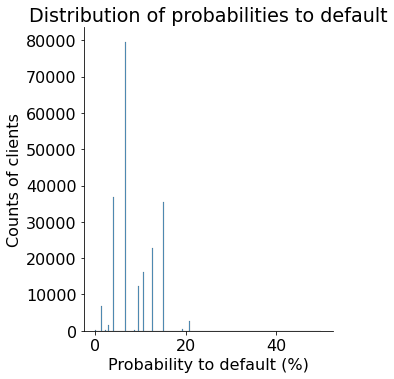

In [155]:
sns.displot(data = y_test_proba[:,0], x = 100*y_test_proba[:,1])
plt.title('Distribution of probabilities to default')
plt.xlabel('Probability to default (%)')
plt.ylabel('Counts of clients')

#### 7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

##### train set - confusion matrix

In [156]:
y_train_predicted = model_dt.predict(X_train_monthly_scaled)
y_train_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [157]:
cm = confusion_matrix(y_train_monthly, y_train_predicted)
print(cm)

[[97742     0]
 [10107     0]]


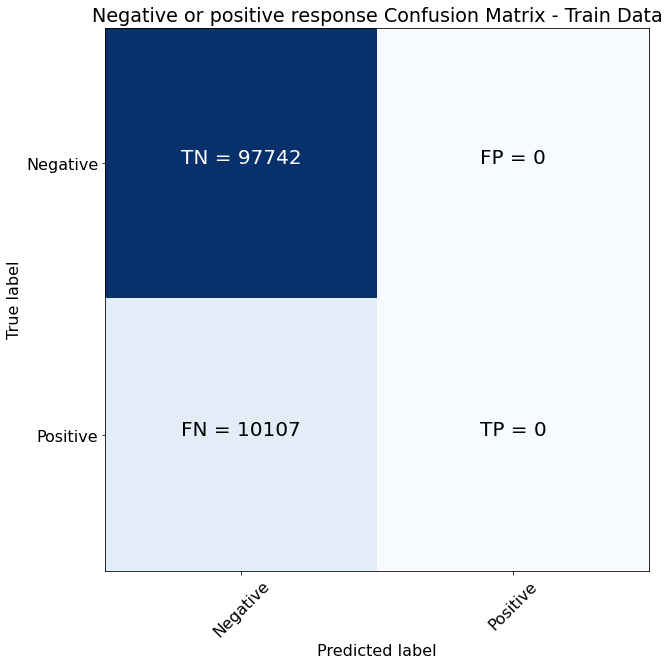

In [158]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Negative or positive response Confusion Matrix - Train Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

##### train data - precision and recall

In [159]:
print(classification_report(y_train_monthly, y_train_predicted, target_names = ['Negative response', 'Positive response']))

                   precision    recall  f1-score   support

Negative response       0.91      1.00      0.95     97742
Positive response       0.00      0.00      0.00     10107

         accuracy                           0.91    107849
        macro avg       0.45      0.50      0.48    107849
     weighted avg       0.82      0.91      0.86    107849



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### test data - confusion matrix

In [160]:
y_test_predicted = model_dt.predict(X_test_monthly_scaled)
y_test_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [161]:
cm = confusion_matrix(y_test_monthly, y_test_predicted)
print(cm)

[[195397      0]
 [ 20302      0]]


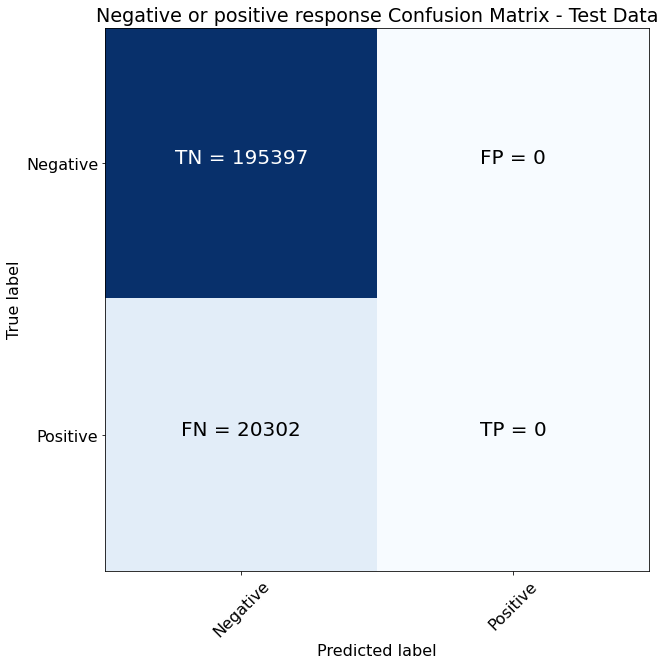

In [162]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Negative or positive response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

In [163]:
print(classification_report(y_test_monthly, y_test_predicted, target_names = ['Negative response', 'Positive response']))

                   precision    recall  f1-score   support

Negative response       0.91      1.00      0.95    195397
Positive response       0.00      0.00      0.00     20302

         accuracy                           0.91    215699
        macro avg       0.45      0.50      0.48    215699
     weighted avg       0.82      0.91      0.86    215699



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### ROC curve

In [164]:
# Scores for train set
scores_train = model_dt.predict_proba(X_train_monthly_scaled)[:, 1]
# Scores for test set
scores_test = model_dt.predict_proba(X_test_monthly_scaled)[:, 1]

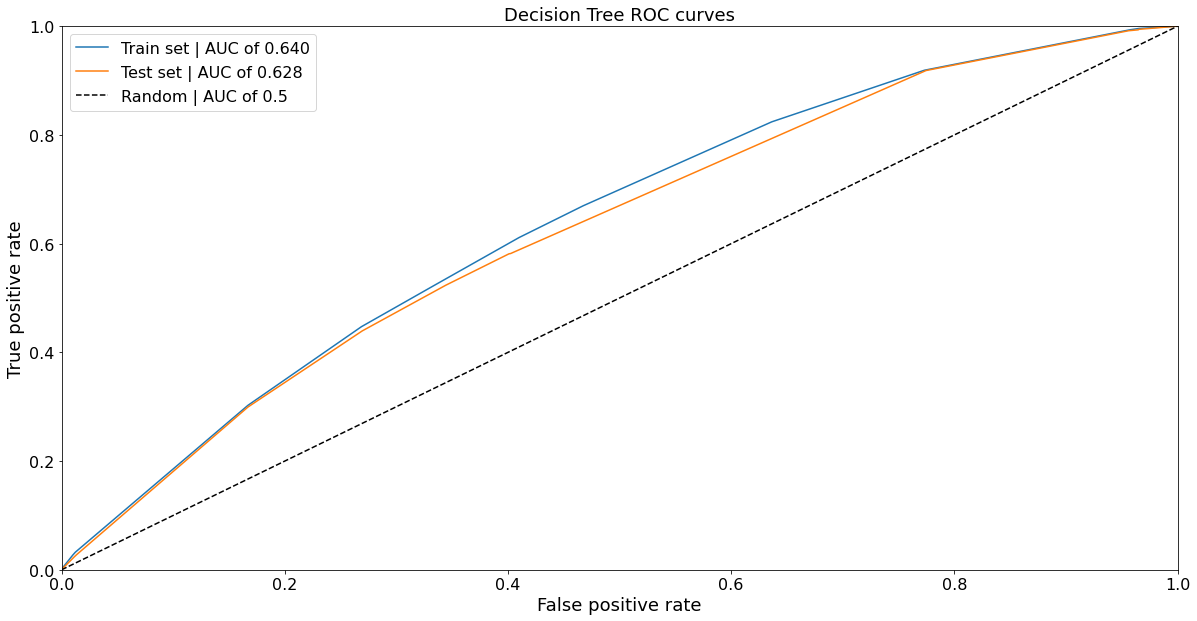

In [165]:
# ROC Calc Train set
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# AUC Calc
auc_train = auc(fpr_train, tpr_train)
# AUC Calc
auc_test  = auc(fpr_test, tpr_test)

# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Decision Tree ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

#### 8. Plot decision boundary for top 2 features.

In [166]:
names[:2]

['txn_cnt_mean_6M', 'txn_cnt_max_6M']

In [167]:
np.argsort(importances, axis=0)[-2:]

array([16, 15])

In [168]:
X_train_monthly_scaled.min(axis=0)[15]

-1.1658179438201839

In [169]:
X_train_monthly_scaled.max(axis=0)[15]

4.862714417611843

In [170]:
X_train_monthly_scaled.min(axis=0)[16]

-1.3042030288026143

In [171]:
X_train_monthly_scaled.max(axis=0)[16]

5.586586966127264

In [172]:
xx, yy = np.mgrid[-2:5:0.5, -2:6:0.5] # The steps 0.5 and 0.5 were selected to create a 14x16 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 14x16

# np.ones is a table full of ones with 224x28 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((224, 28)) * np.median(X_train_monthly_scaled, axis=0) 
pd.DataFrame(median_inputs).iloc[:10, 10:20] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

(224, 2)


,10,11,12,13,14,15,16,17,18,19
0,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
1,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
2,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
3,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
4,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
5,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
6,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
7,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
8,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
9,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774


In [173]:
# Then, we replace the 15th and 16th column with the values of the grid
median_inputs[:,15] = grid[:,0]
median_inputs[:,16] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:10, 10:20] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 15)|(x.name == 16)  else '' for i in x])

,10,11,12,13,14,15,16,17,18,19
0,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-2.000000,-2.000000,0.132418,0.132418,-0.250774
1,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-2.000000,-1.500000,0.132418,0.132418,-0.250774
2,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-2.000000,-1.000000,0.132418,0.132418,-0.250774
3,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-2.000000,-0.500000,0.132418,0.132418,-0.250774
4,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-2.000000,0.000000,0.132418,0.132418,-0.250774
5,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-2.000000,0.500000,0.132418,0.132418,-0.250774
6,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-2.000000,1.000000,0.132418,0.132418,-0.250774
7,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-2.000000,1.500000,0.132418,0.132418,-0.250774
8,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-2.000000,2.000000,0.132418,0.132418,-0.250774
9,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-2.000000,2.500000,0.132418,0.132418,-0.250774


In [174]:
probs = model_dt.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[None,
 (-2.0, 4.0),
 (-2.0, 6.0),
 Text(0.5, 0, 'ann_txn_amt_sum_2012'),
 Text(0, 0.5, 'ann_txn_amt_sum_2011')]

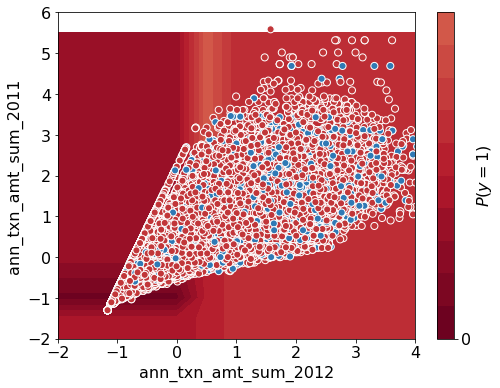

In [175]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 10, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly_scaled[50:, 15], X_train_monthly_scaled[50:, 16], c=y_train_monthly[50:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 4), ylim=(-2, 6),
       xlabel="ann_txn_amt_sum_2012", ylabel="ann_txn_amt_sum_2011")

### Monthly Features - Random Forest

#### 4. Fit the training dataset and optimize the hyperparameters of the method.

In [176]:
# Initiate some parameters that I want to track in the iteration below
max_depth_range = range(2, 8)
estimator_max_depth = []
accuracy_normalized = []
auc_train           = []
auc_test            = []

for i in max_depth_range:
    # Define and fit
    estimator_max_depth.append(RandomForestClassifier(n_estimators = 50, max_depth = i, random_state=1147))
    estimator_max_depth[i-2].fit(X_train_monthly_scaled, y_train_monthly)
    # Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    scores_train = estimator_max_depth[i-2].predict_proba(X_train_monthly_scaled)[:,1] 
    scores_test  = estimator_max_depth[i-2].predict_proba(X_test_monthly_scaled)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator_max_depth[i-2].predict(X_test_monthly_scaled)
    # Calculate accuracy at every iteration and append
    accuracy_normalized.append(100*accuracy_score(y_test_monthly, y_test_predicted, normalize = True))
    # ROC Calc Train set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
    # ROC Calc Test set ############### we don't need to store this in every iteration so we can overwrite it ###############
    fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [177]:
performance_dictionary = {'ACCURACY': accuracy_normalized, 
                          'AUC_TRAIN': auc_train,
                          'AUC_TEST': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df['MAX_DEPTH'] = performance_df.index + 2
performance_df

,ACCURACY,AUC_TRAIN,AUC_TEST,MAX_DEPTH
0,90.58781,0.634094,0.622444,2
1,90.58781,0.641054,0.630658,3
2,90.58781,0.645569,0.633274,4
3,90.58781,0.651814,0.636343,5
4,90.58781,0.660965,0.639025,6
5,90.58781,0.675412,0.642369,7


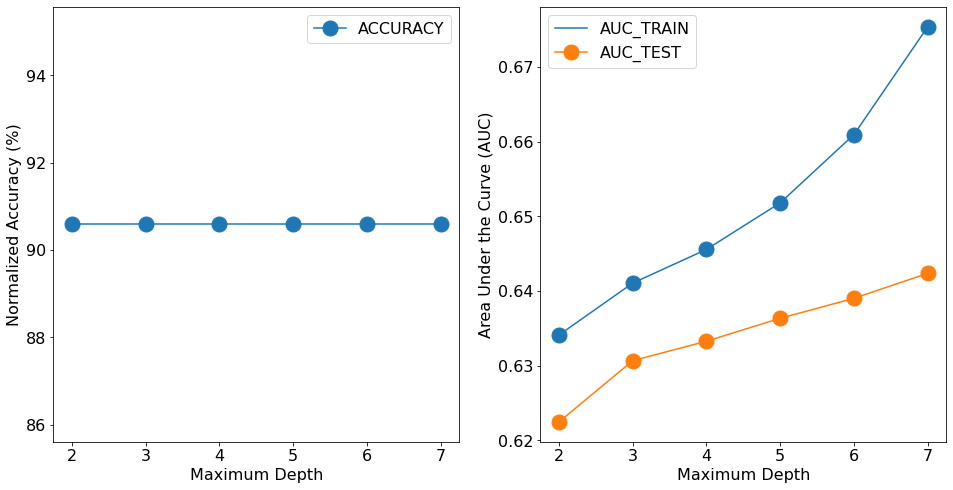

In [178]:
fig_1 = plt.figure(figsize=(16,8))

fig_1_a = plt.subplot(121)
ax1 = performance_df.plot(x = 'MAX_DEPTH', y = 'ACCURACY', ax = fig_1_a, style = 'o-', markersize =15)
ax1.set_ylabel("Normalized Accuracy (%)")
ax1.set_xlabel("Maximum Depth")

fig_1_b = plt.subplot(122)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TRAIN', ax = fig_1_b, style = 'o-', markersize =15)
ax2 = performance_df.plot(x = 'MAX_DEPTH', y = 'AUC_TEST', ax = fig_1_b, style = 'o-', markersize =15)
ax2.set_xlabel("Maximum Depth")
ax2.set_ylabel("Area Under the Curve (AUC)")
#ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()

##### I will select maximum depth of 6, since it brings us a decent amount of AUC for both train and test data, also doesn't make the model too complicated.

In [179]:
# Define and fit
estimator     = RandomForestClassifier(random_state=1147, max_depth = 6, criterion = 'entropy', class_weight = 'balanced')
rf_best_model = estimator.fit(X_train_monthly_scaled, y_train_monthly)
# Score train and test set ############### we don't need to store this in every iteration so we can overwrite it ###############
scores_train = rf_best_model.predict_proba(X_train_monthly_scaled)[:,1] 
scores_test  = rf_best_model.predict_proba(X_test_monthly_scaled)[:,1]  
# Predict the class of test set
y_test_predicted = rf_best_model.predict(X_test_monthly_scaled)
# Calculate accuracy at every iteration and append
accuracy = 100*accuracy_score(y_test_monthly, y_test_predicted, normalize = True)
# ROC Calc Train set 
fpr_train, tpr_train, _ = roc_curve(y_train_monthly, scores_train)
# ROC Calc Test set
fpr_test, tpr_test, _ = roc_curve(y_test_monthly, scores_test)
# Calculate the AUCs
auc_train = auc(fpr_train, tpr_train)
auc_test  = auc(fpr_test, tpr_test)

#### 5. Plot coeffcient values or feature importance.

In [180]:
np.mean(scores_test*100)

45.16712949281263

In [181]:
# Calculate feature importances
importances = rf_best_model.feature_importances_
importances

array([0.008178  , 0.00188874, 0.01629863, 0.01903044, 0.02600641,
       0.00392575, 0.00298273, 0.00374304, 0.05203323, 0.08741259,
       0.08808304, 0.00844123, 0.01172814, 0.01110859, 0.20453218,
       0.14650296, 0.09651256, 0.07676812, 0.07471837, 0.02357849,
       0.00092718, 0.00105205, 0.00118957, 0.00091685, 0.00070716,
       0.0008624 , 0.00080656, 0.030065  ])

In [182]:
np.sort(importances)[-2:]

array([0.14650296, 0.20453218])

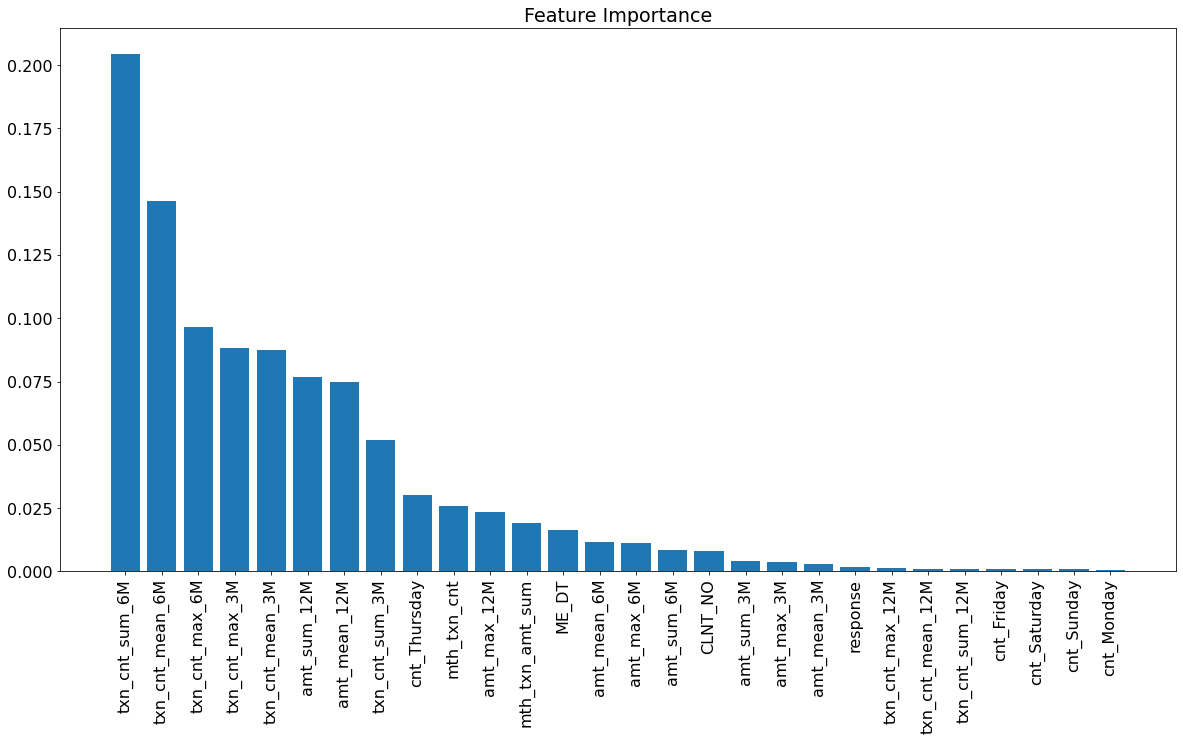

In [183]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [monthly_features_outputs.columns[i] for i in indices]

# Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_mth.shape[1] - 2), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_mth.shape[1] - 2), names, rotation=90)
# Show plot
plt.show()

#### 6. Plot probability distribution for test set.

Text(-11.969999999999999, 0.5, 'Counts of clients')

<Figure size 360x360 with 0 Axes>

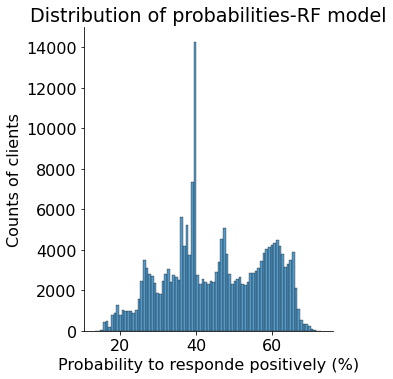

In [184]:
plt.figure(figsize=(5,5))
sns.displot(data = scores_test, x = 100*scores_test)
plt.title('Distribution of probabilities-RF model')
plt.xlabel('Probability to responde positively (%)')
plt.ylabel('Counts of clients')

#### 7. Plot confusion matrix and ROC curves of train/test set. Calculate precision/recall.

##### test data - confusion matrix

In [185]:
cm = confusion_matrix(y_test_monthly, y_test_predicted)
print(cm)

[[125395  70002]
 [  9259  11043]]


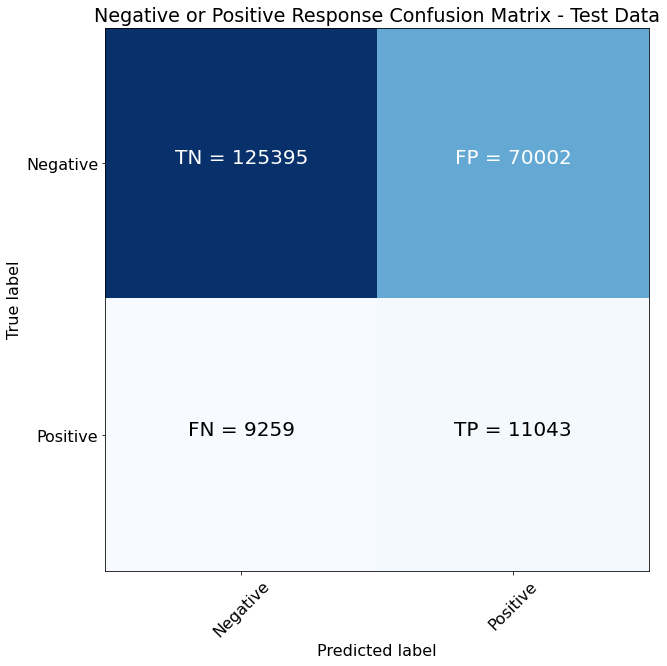

In [186]:
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['Negative','Positive']
plt.title('Negative or Positive Response Confusion Matrix - Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.show()

##### test data - precision and recall

In [187]:
print(classification_report(y_test_monthly, y_test_predicted, target_names = ['Negative response', 'Positive response']))

                   precision    recall  f1-score   support

Negative response       0.93      0.64      0.76    195397
Positive response       0.14      0.54      0.22     20302

         accuracy                           0.63    215699
        macro avg       0.53      0.59      0.49    215699
     weighted avg       0.86      0.63      0.71    215699



##### ROC Curve

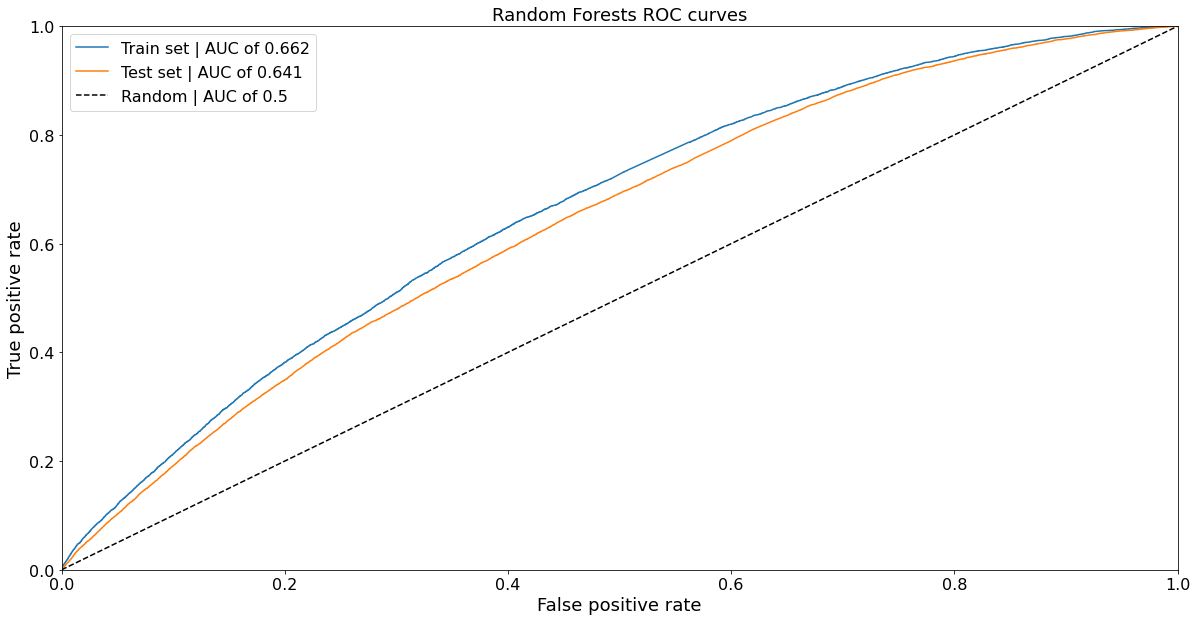

In [188]:
# Plotting
plt.plot(fpr_train, tpr_train, label='Train set | AUC of {:4.3f}'.format(auc_train));
plt.plot(fpr_test, tpr_test, label='Test set | AUC of {:4.3f}'.format(auc_test));
plt.plot([0,1], [0,1], color = 'k', linestyle = '--', label = 'Random | AUC of 0.5');
plt.ylim([0,1.0])
plt.xlim([0,1.0])
plt.title('Random Forests ROC curves', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlabel('False positive rate', fontsize = 18)
plt.legend()
plt.show()

##### 8. Plot decision boundary for top 2 features.

In [189]:
names[:2]

['txn_cnt_sum_6M', 'txn_cnt_mean_6M']

In [190]:
np.argsort(importances, axis=0)[-2:]

array([15, 14])

In [191]:
X_train_monthly_scaled.min(axis=0)[15]

-1.1658179438201839

In [192]:
X_train_monthly_scaled.max(axis=0)[15]

4.862714417611843

In [193]:
X_train_monthly_scaled.min(axis=0)[14]

-1.1658179438201837

In [194]:
X_train_monthly_scaled.max(axis=0)[14]

4.862714417611841

In [195]:
xx, yy = np.mgrid[-2:5:0.5, -2:6:0.5] # The steps 0.5 and 0.5 were selected to create a 14x16 grid
grid = np.c_[xx.ravel(), yy.ravel()]
print(grid.shape) # Confirm that grid shape is 14x16

# np.ones is a table full of ones with 224x28 dimension
# np.median calculates the median of every column in the X_train along axis=0 (i.e. column)
median_inputs = np.ones((224, 28)) * np.median(X_train_monthly_scaled, axis=0) 
pd.DataFrame(median_inputs).iloc[:10, 10:20] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table

(224, 2)


,10,11,12,13,14,15,16,17,18,19
0,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
1,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
2,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
3,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
4,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
5,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
6,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
7,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
8,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774
9,-0.011853,-0.066514,-0.066514,-0.156782,-0.100794,-0.100794,0.014035,0.132418,0.132418,-0.250774


In [196]:
# Then, we replace the 15th and 14th column with the values of the grid
median_inputs[:,15] = grid[:,0]
median_inputs[:,14] = grid[:,1]
df = pd.DataFrame(median_inputs).iloc[:13, 10:20] # Convert to pandas is not necessary. Just doing it here to have a nice view of the table
df.style.apply(lambda x: ['background: grey' if (x.name == 15)|(x.name == 14)  else '' for i in x])

,10,11,12,13,14,15,16,17,18,19
0,-0.011853,-0.066514,-0.066514,-0.156782,-2.000000,-2.000000,0.014035,0.132418,0.132418,-0.250774
1,-0.011853,-0.066514,-0.066514,-0.156782,-1.500000,-2.000000,0.014035,0.132418,0.132418,-0.250774
2,-0.011853,-0.066514,-0.066514,-0.156782,-1.000000,-2.000000,0.014035,0.132418,0.132418,-0.250774
3,-0.011853,-0.066514,-0.066514,-0.156782,-0.500000,-2.000000,0.014035,0.132418,0.132418,-0.250774
4,-0.011853,-0.066514,-0.066514,-0.156782,0.000000,-2.000000,0.014035,0.132418,0.132418,-0.250774
5,-0.011853,-0.066514,-0.066514,-0.156782,0.500000,-2.000000,0.014035,0.132418,0.132418,-0.250774
6,-0.011853,-0.066514,-0.066514,-0.156782,1.000000,-2.000000,0.014035,0.132418,0.132418,-0.250774
7,-0.011853,-0.066514,-0.066514,-0.156782,1.500000,-2.000000,0.014035,0.132418,0.132418,-0.250774
8,-0.011853,-0.066514,-0.066514,-0.156782,2.000000,-2.000000,0.014035,0.132418,0.132418,-0.250774
9,-0.011853,-0.066514,-0.066514,-0.156782,2.500000,-2.000000,0.014035,0.132418,0.132418,-0.250774


In [197]:
probs = rf_best_model.predict_proba(median_inputs)[:, 1].reshape(xx.shape)

[None,
 (-2.0, 6.0),
 (-2.0, 6.0),
 Text(0.5, 0, 'txn_cnt_mean_6M'),
 Text(0, 0.5, 'txn_cnt_sum_6M')]

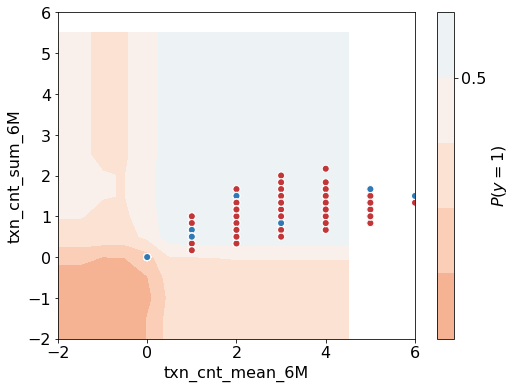

In [198]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 5, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X_train_monthly.iloc[:, 15], X_train_monthly.iloc[:, 14], c=y_train_monthly[:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="auto",
       xlim=(-2, 6), ylim=(-2, 6),
       xlabel="txn_cnt_mean_6M", ylabel="txn_cnt_sum_6M")

## 1.3 Comparison of methods

| Model | Top 2 Features | Coeffcient Values or Feature Importance | Mean of Distribution | AUC train set | AUC test set| Precision (negative response) | Precision (positive response) | Recall (negative response) | Recall (positive response) | Model Accuracy |
| ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| **Annual - Logistic Regression** | ann_txn_amt_sum_2013, ann_txn_amt_ave_2014 | 0.67, 0.55 | 0.0836 | 0.817 | 0.744 | 0.90 | 0.22 | 0.99 | 0.02 | 0.92 |
| **Annual - Decision Tree** | ann_txn_amt_sum_2012, ann_txn_amt_sum_2011 | 0.57, 0.19 | 0.0836 | 0.773 | 0.718 | 0.92 | 0.81 | 1.00 | 0.11 | 0.92 |
| **Annual - Random Forest** | ann_txn_amt_sum_2012, ann_txn_cnt_2012 | 0.11, 0.08 | 0.3044 | 0.941 | 0.746 | 0.93 | 0.21 | 0.80 | 0.49 | 0.77 |
| **Monthly - Logistic Regression** | txn_cnt_mean_6M, txn_cnt_max_6M | 0.50, 0.48 | 0.0968 | 0.630 | 0.630 | 0.91 | 0.00 | 1.00 | 0.00 | 0.91 |
| **Monthly - Decision Tree** | txn_cnt_mean_6M, txn_cnt_max_6M | 0.59, 0.30 | 0.0877 | 0.640 | 0.628 | 0.91 | 0.00 | 1.00 | 0.00 | 0.91 |
| **Monthly - Random Forest** | txn_cnt_sum_6M, txn_cnt_mean_6M | 0.20, 0.15 | 0.4516 | 0.662 | 0.641 | 0.93 | 0.14 | 0.64 | 0.54 | 0.63 |

#### I will choose annual features with logistic regression as the best model, from the pure data point of view, it has the highest model accuracy, and second highest AUC for test set. Also, by looking at precisions and recalls, as well as coefficient values, the results of this model seems 'more eliable' than others, it is not as extreme as the others such asrandom forest predictions.

#### Notice that random forest has the lowest feature importances, and model accuracy isvery low, so it might not be optimal to use random forest for this problem. Also, monthly feature, regardless of models, is not a good feature, it has lower AUC for both train and test data, and precisions for positive response, based on both logistic regression model and decision tree model, are 0, meaning they have low predictive power. Therefore, for this problem, it is optimal to use annual features with logistic regression model.